In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Colab Notebooks/hamoye24/malaria_final_version.csv'
# path = 'https://drive.google.com/file/d/18WCh6eBSON-fvIRUcZvBV0YFiXq1_4Jr/view?usp=drive_link'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(path)
df.head()

Country Name  Year Country Code  \
0       Algeria  2007          DZA   
1        Angola  2007          AGO   
2         Benin  2007          BEN   
3      Botswana  2007          BWA   
4  Burkina Faso  2007          BFA   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Rural population (% of total population)  \
0                    26.0                                     34.65   
1               1533485.0                                     42.48   
2                     0.0                                     58.44   
3                   390.0                                     42.07   
4                 44246.0                                     77.00   

   Rural population growth (annual %)  \
0                               -0.60   
1                                1.91   
2                                1.99   
3                               -1.44   
4                                2.16   

   Urban population (% of total population)  \
0                                     65.35   
1                                     57.52   
2                                     41.56   
3                                     57.93   
4                                     23.00   

   Urban population growth (annual %)  \
0                                2.71   
1                                5.01   
2                                4.09   
3                                4.80   
4                                5.91   

   People using at least basic drinking water services (% of population)  \
0                                              91.68                       
1                                              47.96                       
2                                              63.78                       
3                                              78.89                       
4                                              52.27                       

   People using at least basic drinking water services, rural (% of rural population)  \
0                                              85.83                                    
1                                              23.77                                    
2                                              54.92                                    
3                                              57.60                                    
4                                              45.13                                    

   People using at least basic drinking water services, urban (% of urban population)  \
0                                              94.78                                    
1                                              65.83                                    
2                                              76.24                                    
3                                              94.35                                    
4                                              76.15                                    

   People using at least basic sanitation services (% of population)  \
0                                              85.85                   
1                                              37.26                   
2                                              11.80                   
3                                              61.60                   
4                                              15.60                   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              76.94                                
1                                              14.00                                
2     

In [5]:
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'geometry'],
      dtype='object')

In [6]:
df.shape

(594, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country Name                                                                        594 non-null    object 
 1   Year                                                                                594 non-null    int64  
 2   Country Code                                                                        594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                 550 non-null    float64
 4   Malaria cases reported                                                              550 non-null    float64
 5   Rural population (% of total population)                                            588 non-null   

In [8]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

In [9]:
# Fill missing values in numerical columns with the median
missing_values_cols = ['Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude']
for col in missing_values_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with missing values in 'geometry' column
df.dropna(subset=['geometry'], inplace=True)

# Check for missing values again
print(df.isnull().sum())

Country Name                                                                          0
Year                                                                                  0
Country Code                                                                          0
Incidence of malaria (per 1,000 population at risk)                                   0
Malaria cases reported                                                                0
Rural population (% of total population)                                              0
Rural population growth (annual %)                                                    0
Urban population (% of total population)                                              0
Urban population growth (annual %)                                                    0
People using at least basic drinking water services (% of population)                 0
People using at least basic drinking water services, rural (% of rural population)    0
People using at least basic drin

In [10]:
df['Incidence of malaria (per 1,000 population at risk)'].nunique()

500

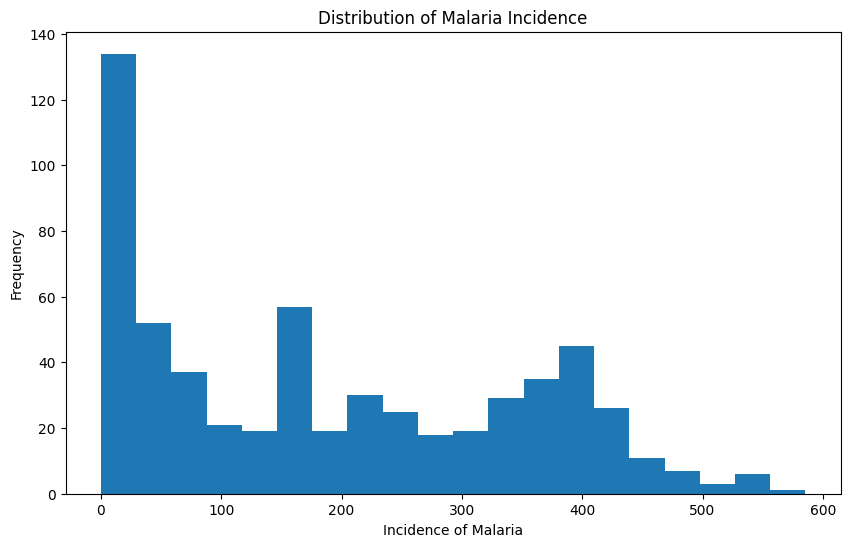

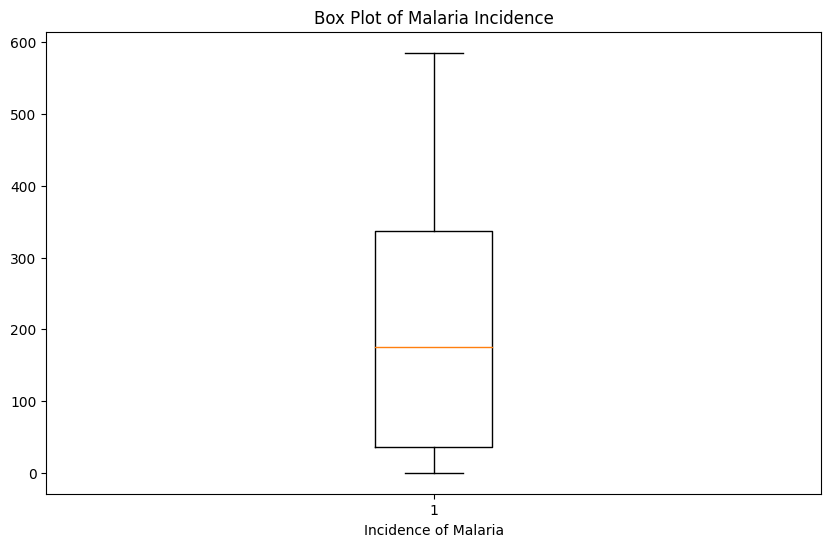

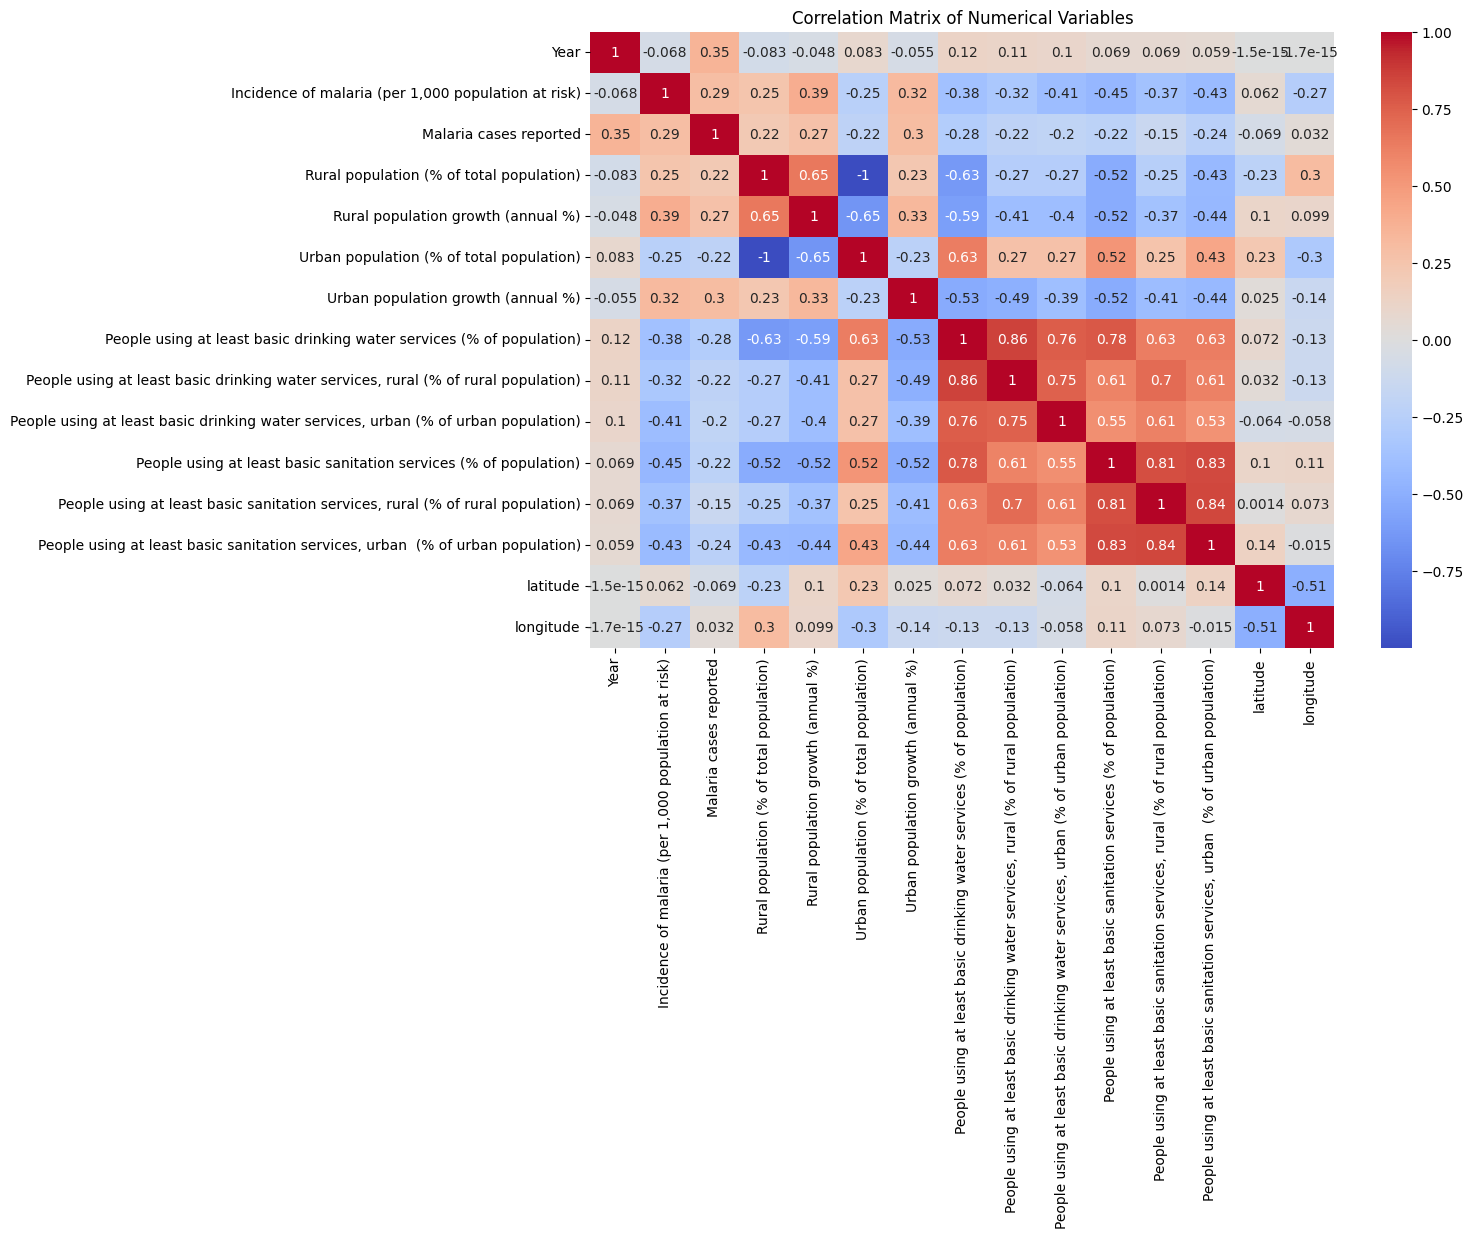

In [11]:
# Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['Incidence of malaria (per 1,000 population at risk)'], bins=20)
plt.xlabel('Incidence of Malaria')
plt.ylabel('Frequency')
plt.title('Distribution of Malaria Incidence')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
plt.boxplot(df['Incidence of malaria (per 1,000 population at risk)'])
plt.xlabel('Incidence of Malaria')
plt.title('Box Plot of Malaria Incidence')
plt.show()

# Correlation Matrix
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


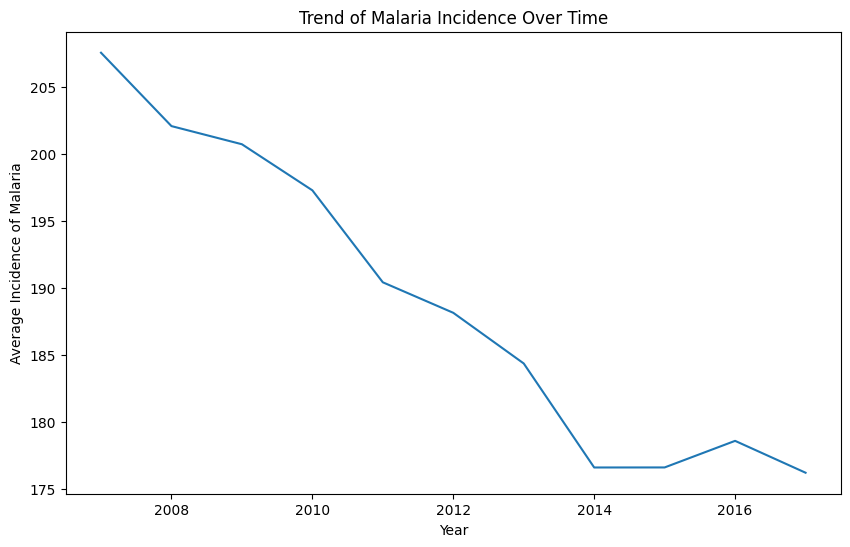

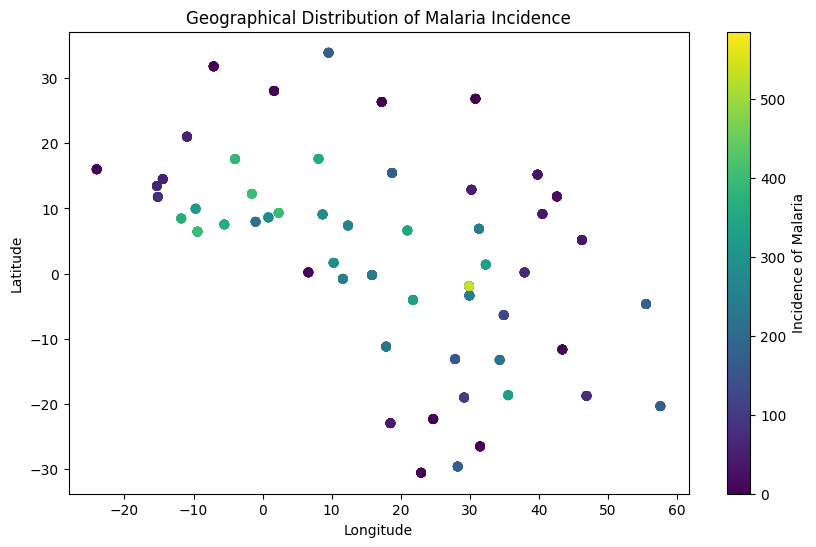

In [12]:
# Temporal Analysis
# Group the data by year and calculate the average incidence of malaria
yearly_incidence = df.groupby('Year')['Incidence of malaria (per 1,000 population at risk)'].mean()

# Plot the trend of malaria incidence over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_incidence.index, yearly_incidence.values)
plt.xlabel('Year')
plt.ylabel('Average Incidence of Malaria')
plt.title('Trend of Malaria Incidence Over Time')
plt.show()

# Spatial Analysis
# Create a scatter plot to visualize the geographical distribution of malaria incidence
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['Incidence of malaria (per 1,000 population at risk)'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Malaria Incidence')
plt.colorbar(label='Incidence of Malaria')
plt.show()

In [13]:
pip install geopandas

^C


In [15]:
pip install basemap


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Spatial Analysis

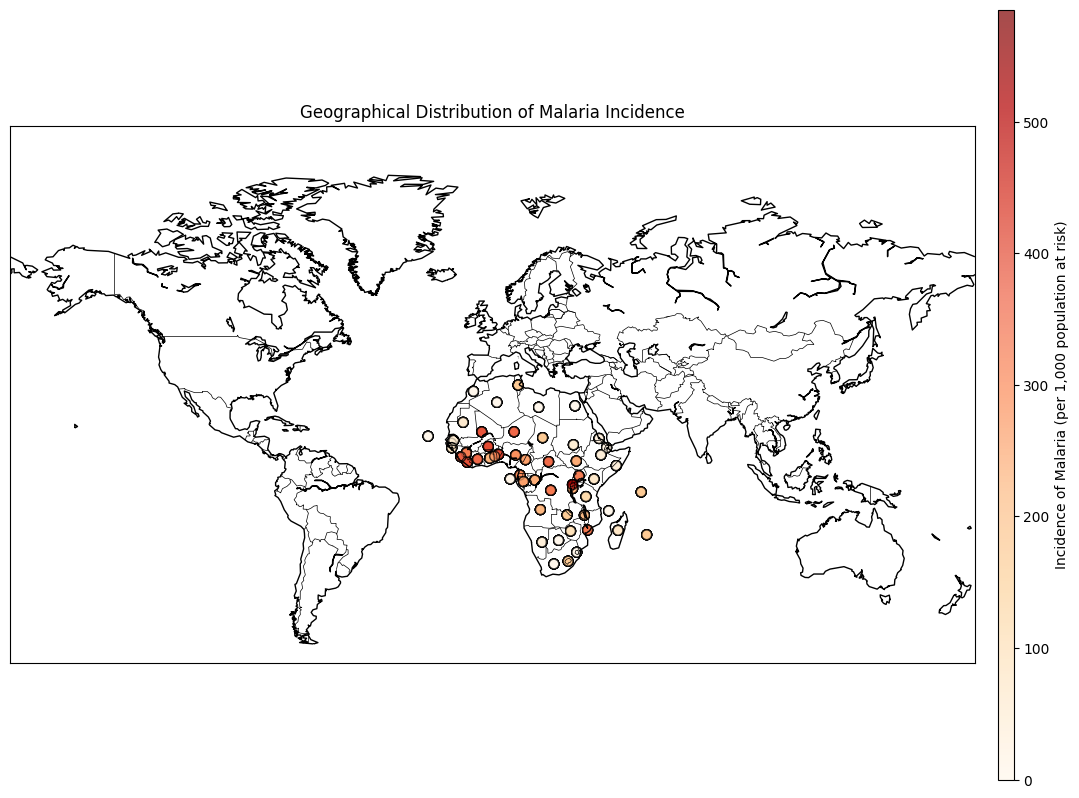

In [17]:
# Load the data into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system to WGS84
gdf.crs = "EPSG:4326"

# Plotting malaria incidence on the world map using Basemap
fig, ax = plt.subplots(figsize=(15, 10))

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country boundaries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map projection coordinates
x, y = m(gdf['longitude'].values, gdf['latitude'].values)

# Scatter plot of malaria incidence
sc = m.scatter(x, y, c=gdf['Incidence of malaria (per 1,000 population at risk)'], cmap='OrRd', s=50, edgecolor='k', alpha=0.7)

# Add color bar
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Incidence of Malaria (per 1,000 population at risk)')

# Add title
plt.title('Geographical Distribution of Malaria Incidence')
plt.show()

## Clustering Analysis

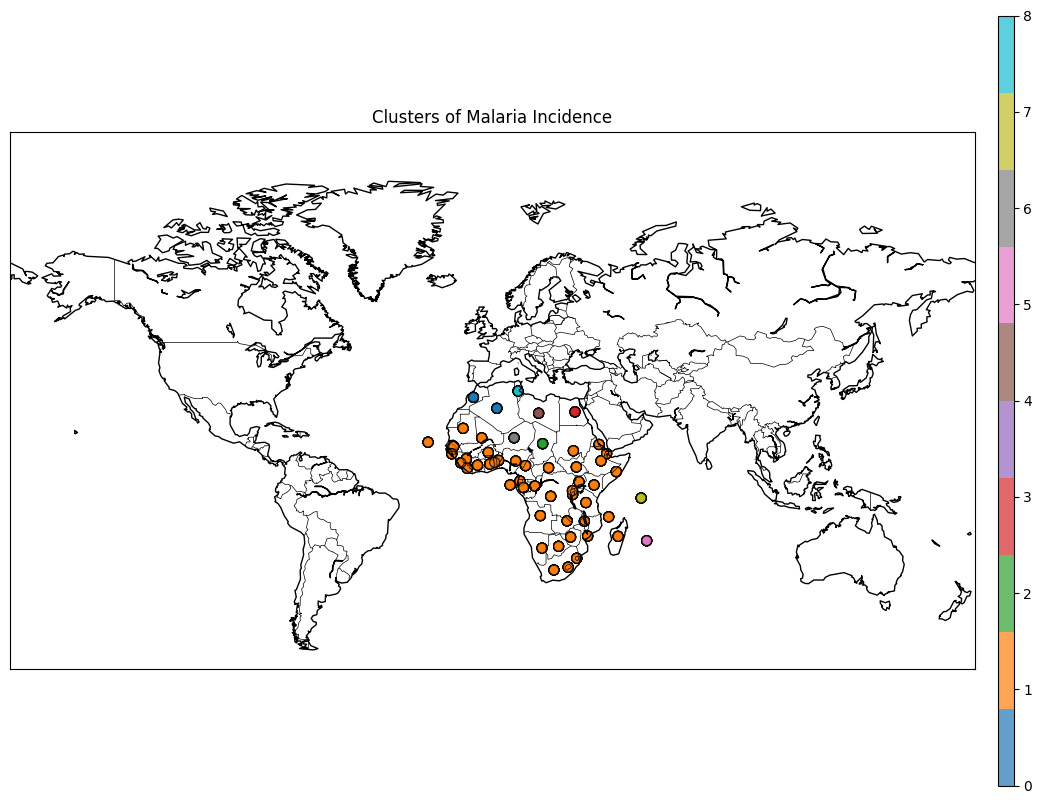

In [18]:
import numpy as np
from sklearn.cluster import DBSCAN

# Extract relevant data for clustering
coords = gdf[['latitude', 'longitude']].values
incidence = gdf['Incidence of malaria (per 1,000 population at risk)'].values

# Standardize the data
coords_scaled = (coords - coords.mean(axis=0)) / coords.std(axis=0)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=10).fit(coords_scaled)
labels = db.labels_

# Add cluster labels to GeoDataFrame
gdf['Cluster'] = labels

# Plotting the clusters
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(gdf['longitude'].values, gdf['latitude'].values)
sc = m.scatter(x, y, c=gdf['Cluster'], cmap='tab10', s=50, edgecolor='k', alpha=0.7)
plt.title('Clusters of Malaria Incidence')
plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=50)
plt.show()

# Display the GeoDataFrame with cluster labels
#import ace_tools as tools; tools.display_dataframe_to_user(name="Malaria Incidence Clusters", dataframe=gdf)


## Predictive Model

In [19]:
# Selecting relevant features and target variable for modeling
features = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude']

# Drop rows with missing values in both features and target variable
data = df[features + ['Incidence of malaria (per 1,000 population at risk)']].dropna()

# Separate features and target variable
X = data[features]
y = data['Incidence of malaria (per 1,000 population at risk)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1044.7853290929431, 0.952692332156144)

## Model Selection and Training

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

## Linear Regression

In [21]:
#define target and feature variables
# Selecting relevant features and target variable for modeling
features = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude','Country Name','Year']

# Drop rows with missing values in both features and target variable
data = df[features + ['Incidence of malaria (per 1,000 population at risk)']].dropna()

# Separate features and target variable
X = data[features]
y = data['Incidence of malaria (per 1,000 population at risk)']

In [22]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

155     32.29
550      3.97
132    113.80
450      0.51
287     16.15
        ...  
71       6.78
106    176.72
270      0.03
435      0.37
102    171.00
Name: Incidence of malaria (per 1,000 population at risk), Length: 475, dtype: float64

In [23]:
numerical_cols = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude','Year']
categorical_cols = ['Country Name']

In [24]:
# Initialize OneHotEncoder and StandardScaler
encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

In [25]:
# One-hot encode the categorical column
encoded_columns = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
# Standard scale the numerical columns
scaled_numerical = scaler.fit_transform(X[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

In [27]:
# Concatenate the processed numerical and categorical columns
X_processed = pd.concat([scaled_numerical_df, encoded_df], axis=1)
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 67 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            594 non-null    float64
 1   Rural population growth (annual %)                                                  594 non-null    float64
 2   Urban population (% of total population)                                            594 non-null    float64
 3   Urban population growth (annual %)                                                  594 non-null    float64
 4   People using at least basic drinking water services (% of population)               594 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  594 non-null   

In [28]:
X = X_processed
X

Rural population (% of total population)  \
0                                   -1.234855   
1                                   -0.799375   
2                                    0.088270   
3                                   -0.822178   
4                                    1.120519   
..                                        ...   
589                                  0.110516   
590                                 -1.417835   
591                                  1.109395   
592                                  0.009294   
593                                  0.606619   

     Rural population growth (annual %)  \
0                             -1.670031   
1                              0.434005   
2                              0.501066   
3                             -2.374171   
4                              0.643570   
..                                  ...   
589                            0.157379   
590                           -0.999422   
591                            1.356093   
592                            0.517831   
593                            0.132231   

     Urban population (% of total population)  \
0                                    1.234825   
1                                    0.799340   
2                                   -0.088316   
3                                    0.822143   
4                                   -1.120577   
..                                        ...   
589                                 -0.110563   
590                                  1.417806   
591                                 -1.109453   
592                                 -0.009339   
593                                 -0.606671   

     Urban population growth (annual %)  \
0                             -0.563033   
1                              1.025600   
2                              0.390146   
3                              0.880551   
4                              1.647239   
..                                  ...   
589                            0.182933   
590                           -1.350443   
591                            1.882080   
592                            0.473032   
593                           -1.550749   

     People using at least basic drinking water services (% of population)  \
0                                             1.495789                       
1                                            -1.048750                       
2                                            -0.128013                       
3                                             0.751401                       
4                                            -0.797904                       
..                                                 ...                       
589                                          -0.049442                       
590                                           1.761766                       
591                                          -0.982401                       
592                                          -0.350340                       
593                                          -0.112299                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                             1.864888                                    
1                                            -1.496740                                    
2                                             0.190574                                    
3                                             0.335743                                    
4                                            -0.339724                                    
..                                                 ...                                    
589                                          -0.163139                                    
590                                           2.020890                                    
591                                  

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Initialize the regression model
lr = LinearRegression()
lr

LinearRegression()

In [31]:
#fit the model to training data
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions on the training data
lr_train_pred = lr.predict(X_train)
#doing a recall
lr_test_pred = lr.predict(X_test)
#lr_test_pred

## Model Performance
Here we are going to compare the actual value (y_train) versus the predicted value (y_lr_train)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating model for training data
lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, lr_train_pred)

print("Mean Squared Error(Train):", lr_train_mse)
print("R2 score(Train):", lr_train_r2)

# Evaluating model for testing data
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("Mean Squared Error(Test):", lr_test_mse)
print("R2 score(Test):", lr_test_r2)


Mean Squared Error(Train): 1445.785647883463
R2 score(Train): 0.9425724305442191
Mean Squared Error(Test): 1448.3540662385299
R2 score(Test): 0.9344188215722781


In [34]:
lr_results = pd.DataFrame({
    'Method': ['Linear Regression'],
    'Train MSE': [lr_train_mse],
    'Train R2 Score': [lr_train_r2],
    'Test MSE': [lr_test_mse],
    'Test R2 Score': [lr_test_r2]
})
lr_results

Method    Train MSE  Train R2 Score     Test MSE  Test R2 Score
0  Linear Regression  1445.785648        0.942572  1448.354066       0.934419

## Random Forest Regression

In [35]:
#Training the model
rf= RandomForestRegressor(max_depth = 2, random_state=100)  # You can adjust hyperparameters
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [36]:
#Make predictions on the training data
rf_train_pred = rf.predict(X_train)
#doing a recall
rf_test_pred = rf.predict(X_test)

In [37]:
#Evaluating the model
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_r2 = r2_score(y_train, rf_train_pred)


print("Mean Squared Error(Train):", rf_train_mse)
print("R2 score(Train):", rf_train_r2)

# Evaluating model for training data
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print("Mean Squared Error(Test):", rf_test_mse)
print("R2 score(Test):", rf_test_r2)


Mean Squared Error(Train): 10947.518690262812
R2 score(Train): 0.5651572618154789
Mean Squared Error(Test): 12011.041688801964
R2 score(Test): 0.4561424678829864


In [38]:
rf_results = pd.DataFrame({
    'Method': ['Random Forest Regression'],
    'Train MSE': [rf_train_mse],
    'Train R2 Score': [rf_train_r2],
    'Test MSE': [rf_test_mse],
    'Test R2 Score': [rf_test_r2]
})
rf_results

Method    Train MSE  Train R2 Score      Test MSE  \
0  Random Forest Regression  10947.51869        0.565157  12011.041689   

   Test R2 Score  
0       0.456142

## Support Vector Regression

In [39]:
#defining the model
svr = SVR()
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search
grid_search_svr = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

# Best model
best_svr = grid_search_svr.best_estimator_
best_svr

SVR(C=100, kernel='linear')

In [40]:
# Make predictions on the test set using the best SVR model
y_pred_best_svr = best_svr.predict(X_test)
y_pred_train_svr = best_svr.predict(X_train)

In [41]:
# Calculate performance metrics for the best SVR model
# Evaluating model for training data
svr_train_mse = mean_squared_error(y_train, y_pred_train_svr)
svr_train_r2 = r2_score(y_train, y_pred_train_svr)

#Evaluating model for test data
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)


# Print the results
print("Best SVR Model Performance:")
print("Mean Squared Error (Test):", mse_best_svr)
print("R-squared (Test):", r2_best_svr)
print("Mean Squared Error(Train):", svr_train_mse)
print("R2 score(Train):", svr_train_r2)

Best SVR Model Performance:
Mean Squared Error (Test): 1734.850232310059
R-squared (Test): 0.9214463332671284
Mean Squared Error(Train): 2070.034168825282
R2 score(Train): 0.9177768632714802


In [42]:
svr_results = pd.DataFrame({
    'Method': ['Support Vector Regression'],
    'Train MSE': [svr_train_mse],
    'Train R2 Score': [svr_train_r2],
    'Test MSE': [mse_best_svr],
    'Test R2 Score': [r2_best_svr]
})
svr_results

Method    Train MSE  Train R2 Score     Test MSE  \
0  Support Vector Regression  2070.034169        0.917777  1734.850232   

   Test R2 Score  
0       0.921446

## Decision Tree

In [43]:
# Define the model
dtr = DecisionTreeRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_dtr = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dtr.fit(X_train, y_train)

# Best model
best_dtr = grid_search_dtr.best_estimator_

In [44]:
y_pred_best_dtr = best_dtr.predict(X_test)
y_pred_train_dtr = best_dtr.predict(X_train)

In [45]:
# Evaluating model for training data
dtr_train_mse = mean_squared_error(y_train, y_pred_train_dtr)
dtr_train_r2 = r2_score(y_train, y_pred_train_dtr)



# Calculate performance metrics for the best Decision Tree Regressor model
mse_best_dtr = mean_squared_error(y_test, y_pred_best_dtr)
r2_best_dtr = r2_score(y_test, y_pred_best_dtr)

# Print the results
print("Decision Tree Regressor Model Performance:")
print("Mean Squared Error (MSE):", mse_best_dtr)
print("R-squared (R²):", r2_best_dtr)
print("Mean Squared Error(Train):", dtr_train_mse)
print("R2 score(Train):", dtr_train_r2)

Decision Tree Regressor Model Performance:
Mean Squared Error (MSE): 2011.6052865546221
R-squared (R²): 0.9089149205302394
Mean Squared Error(Train): 8.843213785517566e-29
R2 score(Train): 1.0


In [46]:
dtr_results = pd.DataFrame({
    'Method': ['Decision Tree'],
    'Train MSE': [dtr_train_mse],
    'Train R2 Score': [dtr_train_r2],
    'Test MSE': [mse_best_dtr],
    'Test R2 Score': [r2_best_dtr]
})
dtr_results

Method     Train MSE  Train R2 Score     Test MSE  Test R2 Score
0  Decision Tree  8.843214e-29             1.0  2011.605287       0.908915

## Elastic Net

In [47]:
# Define the model
elasticnet = ElasticNet()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]
}

# Perform grid search
grid_search_en = GridSearchCV(elasticnet, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_en.fit(X_train, y_train)

# Best model
best_en = grid_search_en.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+03, tolerance: 9.742e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+03, tolerance: 9.630e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.095e+03, tolerance: 9.437e

In [48]:
y_pred_best_en = best_en.predict(X_test)
y_pred_train_en = best_en.predict(X_train)

In [49]:
# Calculate performance metrics for the best ElasticNet model
mse_best_en = mean_squared_error(y_test, y_pred_best_en)
r2_best_en = r2_score(y_test, y_pred_best_en)

#Evaluate training data
en_train_mse = mean_squared_error(y_train, y_pred_train_en)
en_train_r2 = r2_score(y_train, y_pred_train_en)


# Print the results
print("ElasticNet Model Performance:")
print("Mean Squared Error (MSE):", mse_best_en)
print("R-squared (R²):", r2_best_en)
print("Mean Squared Error(Train):", en_train_mse)
print("R2 score(Train):", en_train_r2)

ElasticNet Model Performance:
Mean Squared Error (MSE): 1631.4172720789159
R-squared (R²): 0.9261297567326645
Mean Squared Error(Train): 1724.4211379216272
R2 score(Train): 0.9315048431875199


In [50]:
en_results = pd.DataFrame({
    'Method': ['Elastic Net'],
    'Train MSE': [en_train_mse],
    'Train R2 Score': [en_train_r2],
    'Test MSE': [mse_best_en],
    'Test R2 Score': [r2_best_en]
})
en_results

Method    Train MSE  Train R2 Score     Test MSE  Test R2 Score
0  Elastic Net  1724.421138        0.931505  1631.417272        0.92613

## Model Comparisons

In [51]:
df_models = pd.concat([lr_results,rf_results,svr_results,dtr_results,en_results], axis = 0)
df_models

Method     Train MSE  Train R2 Score      Test MSE  \
0          Linear Regression  1.445786e+03        0.942572   1448.354066   
0   Random Forest Regression  1.094752e+04        0.565157  12011.041689   
0  Support Vector Regression  2.070034e+03        0.917777   1734.850232   
0              Decision Tree  8.843214e-29        1.000000   2011.605287   
0                Elastic Net  1.724421e+03        0.931505   1631.417272   

   Test R2 Score  
0       0.934419  
0       0.456142  
0       0.921446  
0       0.908915  
0       0.926130

In [52]:
df_models.reset_index(drop = True)

Method     Train MSE  Train R2 Score      Test MSE  \
0          Linear Regression  1.445786e+03        0.942572   1448.354066   
1   Random Forest Regression  1.094752e+04        0.565157  12011.041689   
2  Support Vector Regression  2.070034e+03        0.917777   1734.850232   
3              Decision Tree  8.843214e-29        1.000000   2011.605287   
4                Elastic Net  1.724421e+03        0.931505   1631.417272   

   Test R2 Score  
0       0.934419  
1       0.456142  
2       0.921446  
3       0.908915  
4       0.926130

In [53]:
# Pruning the Decision Tree to reduce overfitting
pruned_dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4)
pruned_dtr.fit(X_train, y_train)
y_pred_pruned_dtr = pruned_dtr.predict(X_test)
mse_pruned_dtr = mean_squared_error(y_test, y_pred_pruned_dtr)
r2_pruned_dtr = r2_score(y_test, y_pred_pruned_dtr)

print("Pruned Decision Tree Performance:")
print("Mean Squared Error (MSE):", mse_pruned_dtr)
print("R-squared (R²):", r2_pruned_dtr)

# Compare with Linear Regression and ElasticNet
print("Model Comparison:")
print("Linear Regression - R2:", 0.849779)
print("ElasticNet - R2:", 0.849809)
print("Pruned Decision Tree - R2:", r2_pruned_dtr)


Pruned Decision Tree Performance:
Mean Squared Error (MSE): 2102.4117164699965
R-squared (R²): 0.904803223797043
Model Comparison:
Linear Regression - R2: 0.849779
ElasticNet - R2: 0.849809
Pruned Decision Tree - R2: 0.904803223797043


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and the pruned decision tree
pruned_dtr_pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4))
pruned_dtr_pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_pruned_dtr = pruned_dtr_pipeline.predict(X_test)
mse_pruned_dtr = mean_squared_error(y_test, y_pred_pruned_dtr)
r2_pruned_dtr = r2_score(y_test, y_pred_pruned_dtr)

print("Pruned Decision Tree with Scaling Performance:")
print("Mean Squared Error (MSE):", mse_pruned_dtr)
print("R-squared (R²):", r2_pruned_dtr)

Pruned Decision Tree with Scaling Performance:
Mean Squared Error (MSE): 2096.6807161170555
R-squared (R²): 0.9050627223309144


# Feature Importance

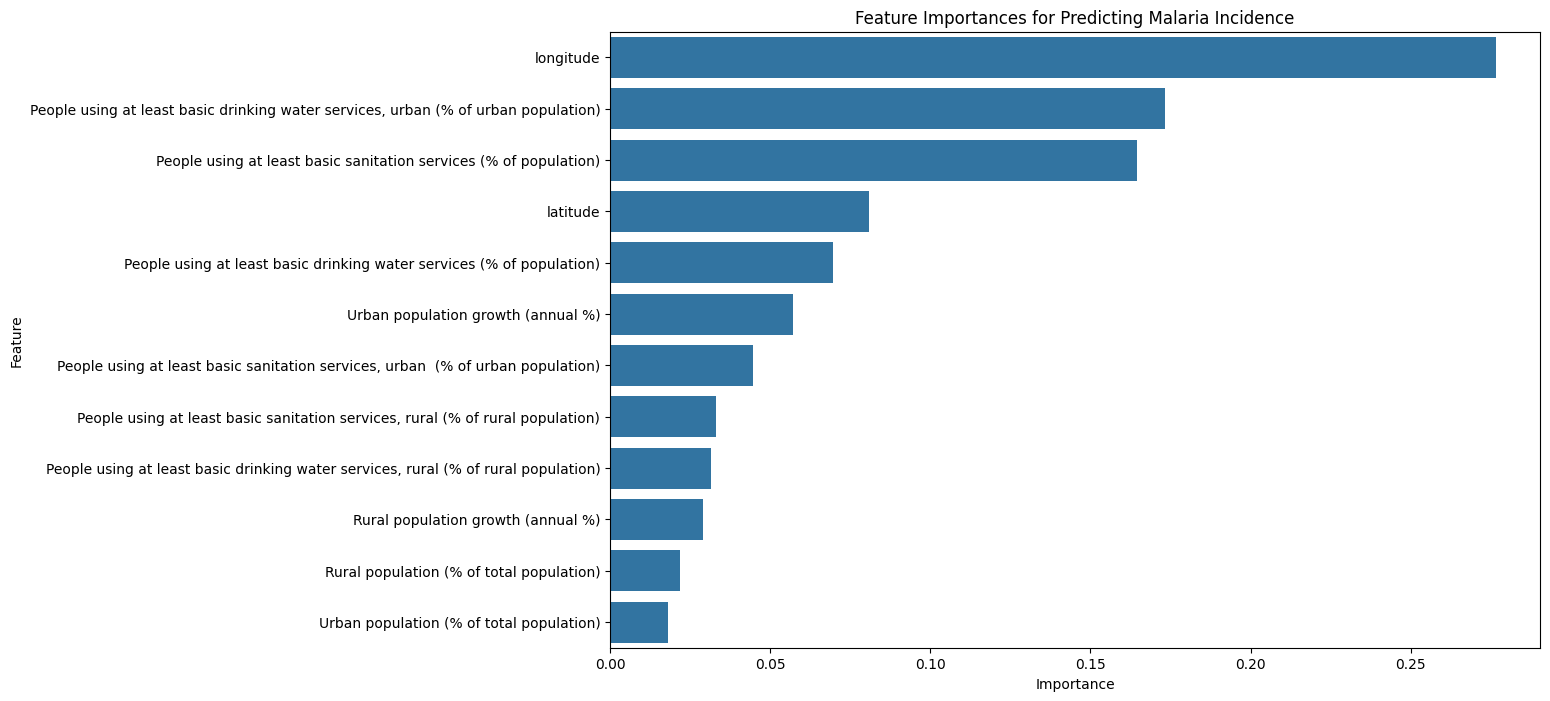

Feature  Importance
11                                          longitude    0.276538
6   People using at least basic drinking water ser...    0.173415
7   People using at least basic sanitation service...    0.164446
10                                           latitude    0.080964
4   People using at least basic drinking water ser...    0.069653
3                  Urban population growth (annual %)    0.057034
9   People using at least basic sanitation service...    0.044615
8   People using at least basic sanitation service...    0.033086
5   People using at least basic drinking water ser...    0.031427
1                  Rural population growth (annual %)    0.029067
0            Rural population (% of total population)    0.021697
2            Urban population (% of total population)    0.018059

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure features and model are defined
features = model.feature_names_in_  # Assuming the model has an attribute for feature names
# or you can use
# features = [...]  # Define your list of features if not available from the model

# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Predicting Malaria Incidence')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df


# CTGAN

In [59]:
!pip install ctgan
!pip install table_evaluator

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [68]:
from ctgan import CTGAN
from table_evaluator import TableEvaluator

In [61]:
data_train = X_train.copy()
data_train['Incidence of malaria (per 1,000 population at risk)'] = y_train

In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 155 to 102
Data columns (total 68 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            475 non-null    float64
 1   Rural population growth (annual %)                                                  475 non-null    float64
 2   Urban population (% of total population)                                            475 non-null    float64
 3   Urban population growth (annual %)                                                  475 non-null    float64
 4   People using at least basic drinking water services (% of population)               475 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  475 non-null    fl

In [63]:
# Treat the encoded columns as categorical columns to make sure the generated data is only 0s and 1s
categorical_features = ['Country Name_Algeria', 'Country Name_Angola', 'Country Name_Benin', 'Country Name_Botswana',
                        'Country Name_Burkina Faso', 'Country Name_Burundi', 'Country Name_Cabo Verde', 'Country Name_Cameroon',
                        'Country Name_Central African Republic', 'Country Name_Chad', 'Country Name_Comoros', 'Country Name_Congo, Dem. Rep.',
                        'Country Name_Congo, Rep.', "Country Name_Cote d'Ivoire", 'Country Name_Djibouti', 'Country Name_Egypt, Arab Rep.',
                        'Country Name_Equatorial Guinea', 'Country Name_Eritrea', 'Country Name_Eswatini', 'Country Name_Ethiopia', 'Country Name_Gabon', 'Country Name_Gambia, The', 'Country Name_Ghana',
                        'Country Name_Guinea', 'Country Name_Guinea-Bissau', 'Country Name_Kenya', 'Country Name_Lesotho',
                        'Country Name_Liberia', 'Country Name_Libya', 'Country Name_Madagascar', 'Country Name_Malawi', 'Country Name_Mali',
                        'Country Name_Mauritania', 'Country Name_Mauritius', 'Country Name_Morocco', 'Country Name_Mozambique', 'Country Name_Namibia',
                        'Country Name_Niger', 'Country Name_Nigeria', 'Country Name_Rwanda', 'Country Name_Sao Tome and Principe', 'Country Name_Senegal',
                        'Country Name_Seychelles', 'Country Name_Sierra Leone', 'Country Name_Somalia', 'Country Name_South Africa', 'Country Name_South Sudan',
                        'Country Name_Sudan', 'Country Name_Tanzania', 'Country Name_Togo', 'Country Name_Tunisia', 'Country Name_Uganda', 'Country Name_Zambia', 'Country Name_Zimbabwe']

In [64]:
ctgan = CTGAN(verbose=True)
ctgan.fit(data_train, categorical_features, epochs = 100)

Gen. (-4.52) | Discrim. (-0.44): 100%|██████████| 100/100 [00:27<00:00,  3.59it/s]


In [65]:
synth_data = ctgan.sample(200)

In [69]:
print(data_train.shape, synth_data.shape)
table_evaluator =  TableEvaluator(data_train, synth_data, cat_cols= categorical_features)

(475, 68) (200, 68)


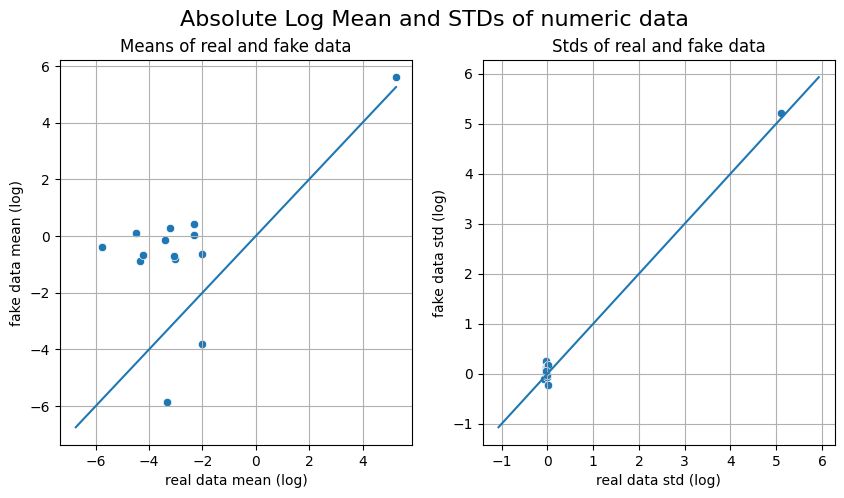

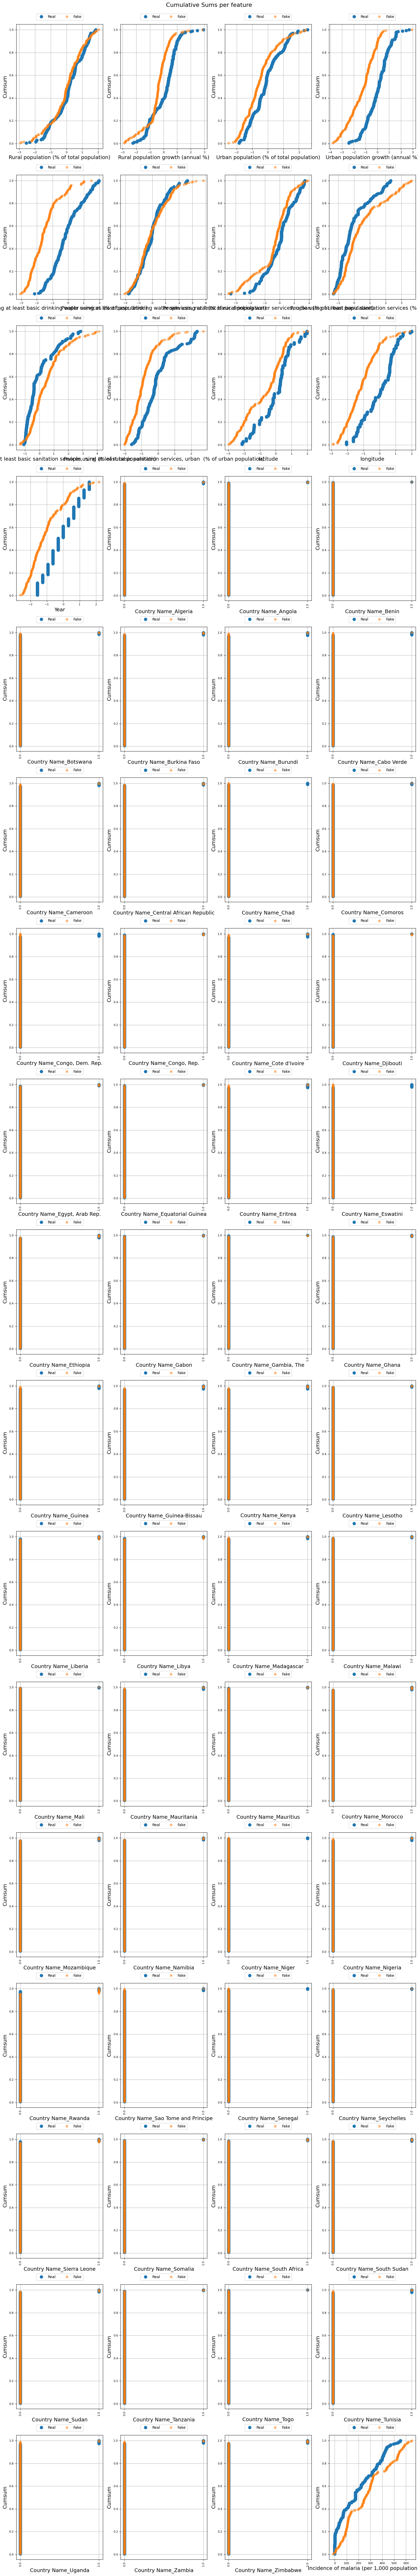

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

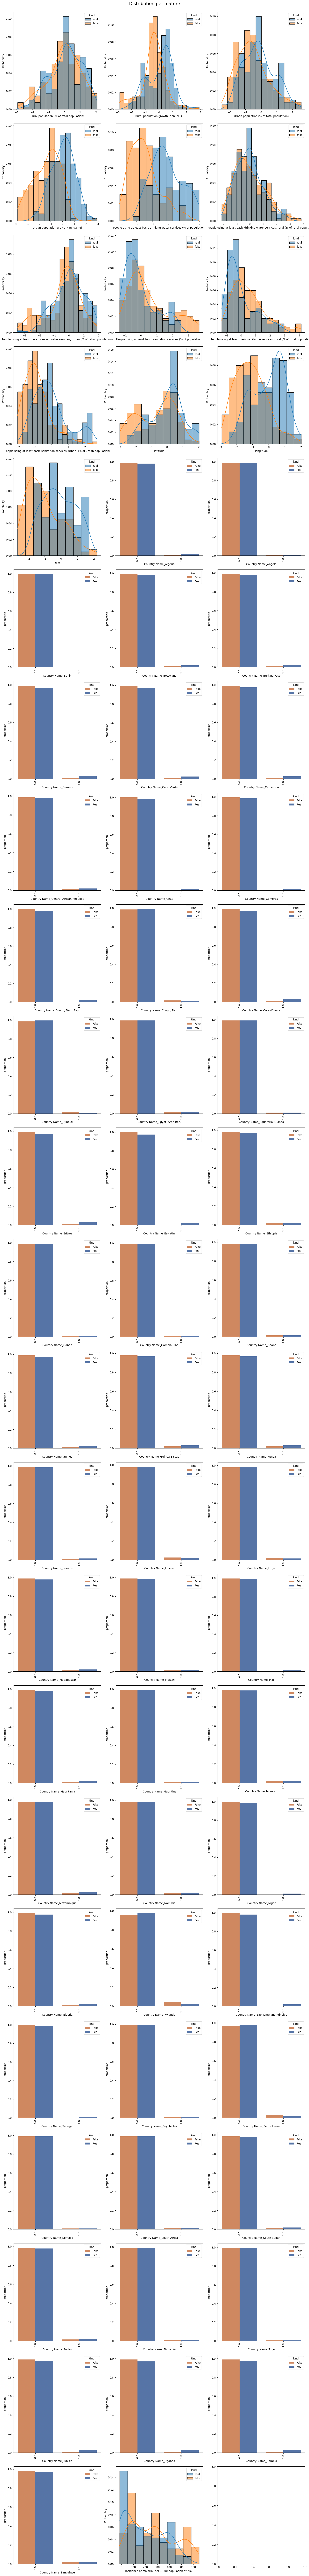

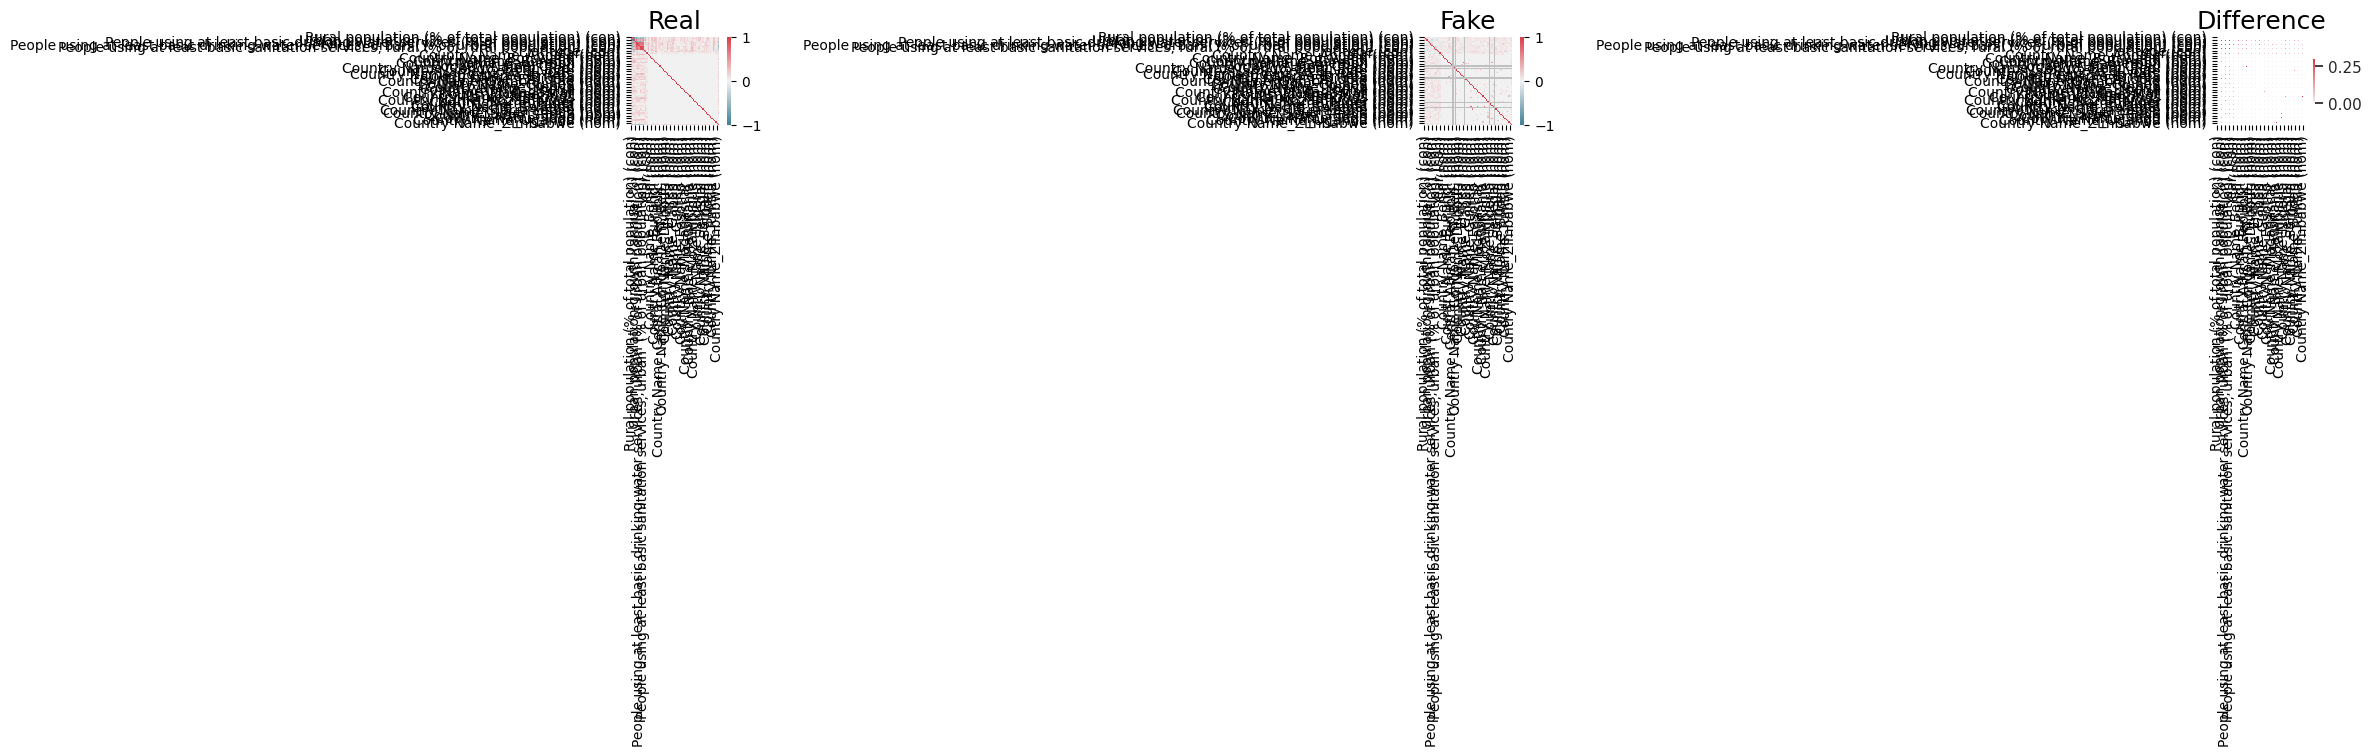

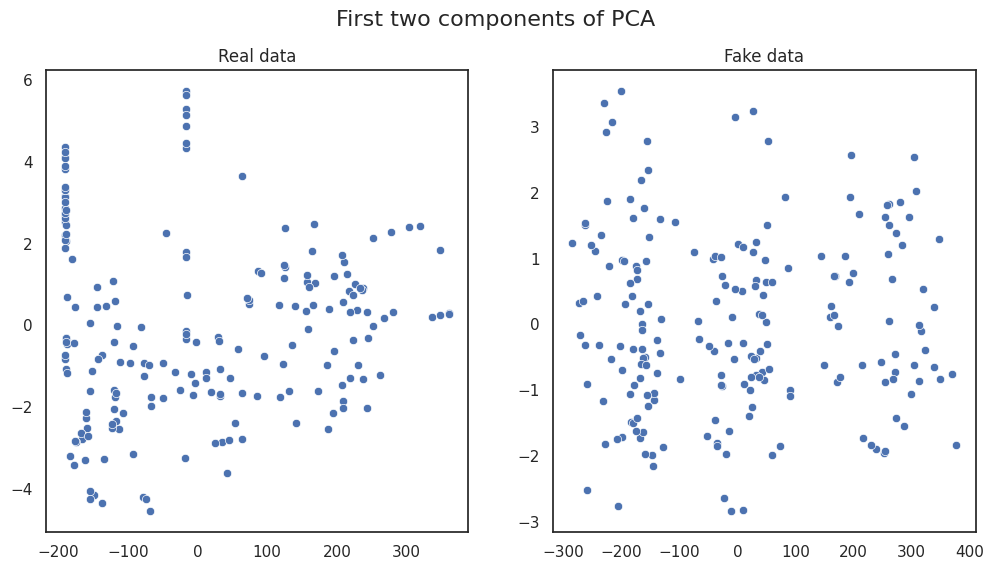

In [70]:
table_evaluator.visual_evaluation()

In [71]:
synth_data.describe()

Rural population (% of total population)  \
count                                200.000000   
mean                                  -0.022503   
std                                    1.038002   
min                                   -2.928072   
25%                                   -0.572028   
50%                                    0.042771   
75%                                    0.727008   
max                                    2.062130   

       Rural population growth (annual %)  \
count                          200.000000   
mean                            -0.442363   
std                              0.892595   
min                             -2.867497   
25%                             -0.725266   
50%                             -0.393139   
75%                              0.063237   
max                              2.872046   

       Urban population (% of total population)  \
count                                200.000000   
mean                                  -0.526634   
std                                    1.025726   
min                                   -2.516882   
25%                                   -1.208893   
50%                                   -0.647111   
75%                                    0.017045   
max                                    2.426210   

       Urban population growth (annual %)  \
count                          200.000000   
mean                            -1.311040   
std                              1.131771   
min                             -3.772198   
25%                             -2.130747   
50%                             -1.110692   
75%                             -0.423496   
max                              2.910324   

       People using at least basic drinking water services (% of population)  \
count                                         200.000000                       
mean                                           -1.501222                       
std                                             0.927147                       
min                                            -3.065939                       
25%                                            -2.199907                       
50%                                            -1.652877                       
75%                                            -1.091538                       
max                                             1.472746                       

       People using at least basic drinking water services, rural (% of rural population)  \
count                                         200.000000                                    
mean                                           -0.002831                                    
std                                             1.140467                                    
min                                            -2.073378                                    
25%                                            -0.828039                                    
50%                                            -0.191884                                    
75%                                             0.713309                                    
max                                             3.813542                                    

       People using at least basic drinking water services, urban (% of urban population)  \
count                                         200.000000                                    
mean                                           -0.413848                                    
std                                             1.170598                                    
min                                            -3.467199                                    
25%                                            -0.747112                                    
50%                                            -0.210150                                    
75%                                             0.317710         

In [72]:
# Merge the real and generated data to create a new train dataset
merged_train = pd.concat([data_train, synth_data], ignore_index=True)

In [73]:
merged_train

Rural population (% of total population)  \
0                                    0.564906   
1                                    0.799053   
2                                    0.190605   
3                                    1.103833   
4                                    0.088548   
..                                        ...   
670                                  0.165164   
671                                  0.140341   
672                                  0.205615   
673                                 -1.360659   
674                                  1.029368   

     Rural population growth (annual %)  \
0                              0.551362   
1                              0.542979   
2                              0.408857   
3                             -0.647352   
4                              0.237013   
..                                  ...   
670                           -1.150176   
671                           -0.256284   
672                            1.724754   
673                            0.192386   
674                           -2.126693   

     Urban population (% of total population)  \
0                                   -0.564958   
1                                   -0.799107   
2                                   -0.190652   
3                                   -1.103891   
4                                   -0.088316   
..                                        ...   
670                                 -0.310384   
671                                 -0.893720   
672                                 -1.061314   
673                                 -0.900702   
674                                 -0.364525   

     Urban population growth (annual %)  \
0                             -0.784060   
1                             -0.466334   
2                             -0.010465   
3                             -1.419514   
4                              0.141491   
..                                  ...   
670                            0.049519   
671                           -0.991895   
672                           -0.273660   
673                           -1.346935   
674                            0.155302   

     People using at least basic drinking water services (% of population)  \
0                                            -0.903248                       
1                                             0.825898                       
2                                            -0.296214                       
3                                             0.114102                       
4                                            -0.910814                       
..                                                 ...                       
670                                          -2.156583                       
671                                          -1.667373                       
672                                          -1.128909                       
673                                          -1.989296                       
674                                           0.933466                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                            -0.468101                                    
1                                             1.381715                                    
2                                            -0.166930                                    
3                                             0.431619                                    
4                                            -1.278445                                    
..                                                 ...                                    
670                                           1.344613                                    
671                                          -0.690716                                    
672                                  

In [74]:
# Shuffle the dataset
merged_train = merged_train.sample(frac = 1).reset_index(drop=True)
merged_train

Rural population (% of total population)  \
0                                   -0.381335   
1                                   -0.326076   
2                                    0.657230   
3                                   -1.093032   
4                                    1.029863   
..                                        ...   
670                                  0.260126   
671                                  1.822403   
672                                 -0.356951   
673                                  0.806443   
674                                  2.062130   

     Rural population growth (annual %)  \
0                              0.566233   
1                              0.241205   
2                              0.526214   
3                              0.568127   
4                              0.752544   
..                                  ...   
670                            0.182526   
671                            1.347710   
672                            0.083639   
673                            0.116210   
674                           -0.705799   

     Urban population (% of total population)  \
0                                   -1.651659   
1                                    0.326035   
2                                   -0.657283   
3                                    1.093000   
4                                   -1.029920   
..                                        ...   
670                                 -0.260174   
671                                 -1.822470   
672                                 -0.195822   
673                                  0.452173   
674                                 -0.333792   

     Urban population growth (annual %)  \
0                             -1.555661   
1                             -0.107165   
2                              0.555917   
3                              0.334890   
4                              1.218998   
..                                  ...   
670                           -0.183143   
671                            1.578168   
672                           -2.266103   
673                           -2.079138   
674                           -2.981504   

     People using at least basic drinking water services (% of population)  \
0                                            -1.282893                       
1                                             0.382408                       
2                                            -1.637160                       
3                                            -0.066902                       
4                                            -0.882296                       
..                                                 ...                       
670                                          -0.892772                       
671                                          -0.585472                       
672                                          -2.781291                       
673                                          -2.616750                       
674                                          -2.407994                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                             3.276960                                    
1                                             0.327076                                    
2                                            -1.560657                                    
3                                            -1.198819                                    
4                                            -0.498976                                    
..                                                 ...                                    
670                                          -0.768188                                    
671                                           0.055156                                    
672                                  

In [75]:
merged_train.columns

Index(['Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'Year', 'Country Name_Algeria',
       'Country Name_Angola', 'Country Name_Benin', 'Country Name_Botswana',
       'Country Name_Burkina Faso', 'Country Name_Burundi',
       'Country Name_Cabo Verde', 'Country Name_Cameroon',
       'Country Name_Centra

In [76]:
merged_train['Incidence of malaria (per 1,000 population at risk)']

0      259.231463
1      315.070000
2      402.300000
3      226.320000
4      551.240000
          ...    
670    442.150000
671    220.650000
672    116.840013
673    330.111790
674    116.470262
Name: Incidence of malaria (per 1,000 population at risk), Length: 675, dtype: float64

In [77]:
X_merged_train = merged_train.drop(columns=['Incidence of malaria (per 1,000 population at risk)'])
y_merged_train = merged_train['Incidence of malaria (per 1,000 population at risk)']

In [78]:
# Retrain pruned decision tree with merged data
pruned_dtr_pipeline.fit(X_merged_train, y_merged_train)

# Make predictions and evaluate
y_pred_pruned_dtr = pruned_dtr_pipeline.predict(X_test)
mse_pruned_dtr_2 = mean_squared_error(y_test, y_pred_pruned_dtr)
r2_pruned_dtr_2 = r2_score(y_test, y_pred_pruned_dtr)

print("Pruned Decision Tree Trained on Real and Synthetic Data with Scaling Performance:")
print("Mean Squared Error (MSE):", mse_pruned_dtr_2)
print("R-squared (R²):", r2_pruned_dtr_2)

Pruned Decision Tree Trained on Real and Synthetic Data with Scaling Performance:
Mean Squared Error (MSE): 2345.934799062136
R-squared (R²): 0.8937765479979268


In [79]:
# Compare error scores of the model when trained on real and merged data
scores = [['Real Data', mse_pruned_dtr, r2_pruned_dtr], ['Real and Synthetic Data',mse_pruned_dtr_2, r2_pruned_dtr_2]]
scores_df = pd.DataFrame(scores, columns=['Pruned Decision Tree model Draining Data', 'Mean Squared Error (MSE)', 'R-squared (R²)'])
scores_df

Pruned Decision Tree model Draining Data  Mean Squared Error (MSE)  \
0                                Real Data               2096.680716   
1                  Real and Synthetic Data               2345.934799   

   R-squared (R²)  
0        0.905063  
1        0.893777

## Predicting Countries

In [80]:
data

Rural population (% of total population)  \
0                                       34.65   
1                                       42.48   
2                                       58.44   
3                                       42.07   
4                                       77.00   
..                                        ...   
589                                     58.84   
590                                     31.36   
591                                     76.80   
592                                     57.02   
593                                     67.76   

     Rural population growth (annual %)  \
0                                 -0.60   
1                                  1.91   
2                                  1.99   
3                                 -1.44   
4                                  2.16   
..                                  ...   
589                                1.58   
590                                0.20   
591                                3.01   
592                                2.01   
593                                1.55   

     Urban population (% of total population)  \
0                                       65.35   
1                                       57.52   
2                                       41.56   
3                                       57.93   
4                                       23.00   
..                                        ...   
589                                     41.16   
590                                     68.64   
591                                     23.20   
592                                     42.98   
593                                     32.24   

     Urban population growth (annual %)  \
0                                  2.71   
1                                  5.01   
2                                  4.09   
3                                  4.80   
4                                  5.91   
..                                  ...   
589                                3.79   
590                                1.57   
591                                6.25   
592                                4.21   
593                                1.28   

     People using at least basic drinking water services (% of population)  \
0                                                91.68                       
1                                                47.96                       
2                                                63.78                       
3                                                78.89                       
4                                                52.27                       
..                                                 ...                       
589                                              65.13                       
590                                              96.25                       
591                                              49.10                       
592                                              59.96                       
593                                              64.05                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                                85.83                                    
1                                                23.77                                    
2                                                54.92                                    
3                                                57.60                                    
4                                                45.13                                    
..                                                 ...                                    
589                                              48.39                                    
590                                              88.71                                    
591                                  

In [81]:
X = data.drop(columns=['latitude', 'longitude', 'Country Name'])
y = data['Country Name']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
data_train = X_train.copy()
data_train['Country Name'] = y_train

In [84]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 155 to 102
Data columns (total 13 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            475 non-null    float64
 1   Rural population growth (annual %)                                                  475 non-null    float64
 2   Urban population (% of total population)                                            475 non-null    float64
 3   Urban population growth (annual %)                                                  475 non-null    float64
 4   People using at least basic drinking water services (% of population)               475 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  475 non-null    fl

In [85]:
categorical_features=['Country Name']

In [86]:
ctgan = CTGAN(verbose=True)
ctgan.fit(data_train, categorical_features, epochs = 200)

Gen. (2.56) | Discrim. (-0.16): 100%|██████████| 200/200 [00:23<00:00,  8.52it/s]


In [87]:
synth_data = ctgan.sample(200)

In [88]:
print(data_train.shape, synth_data.shape)
table_evaluator =  TableEvaluator(data_train, synth_data, cat_cols= categorical_features)

(475, 13) (200, 13)


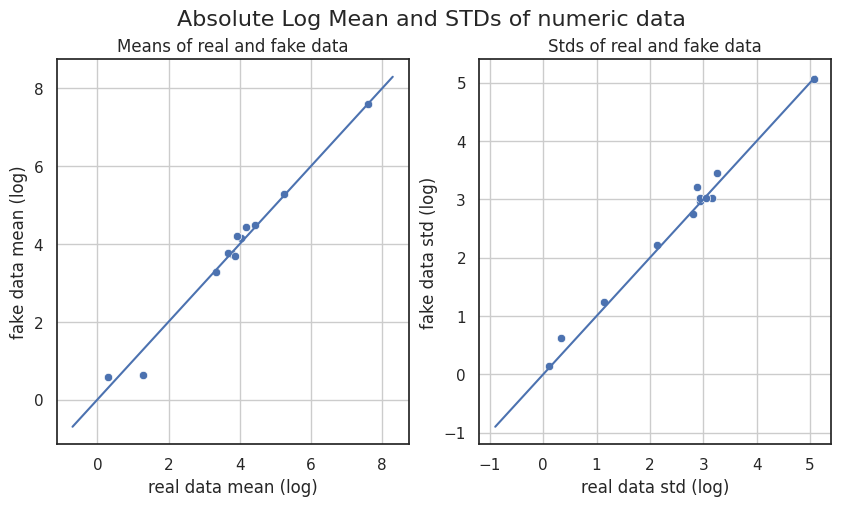

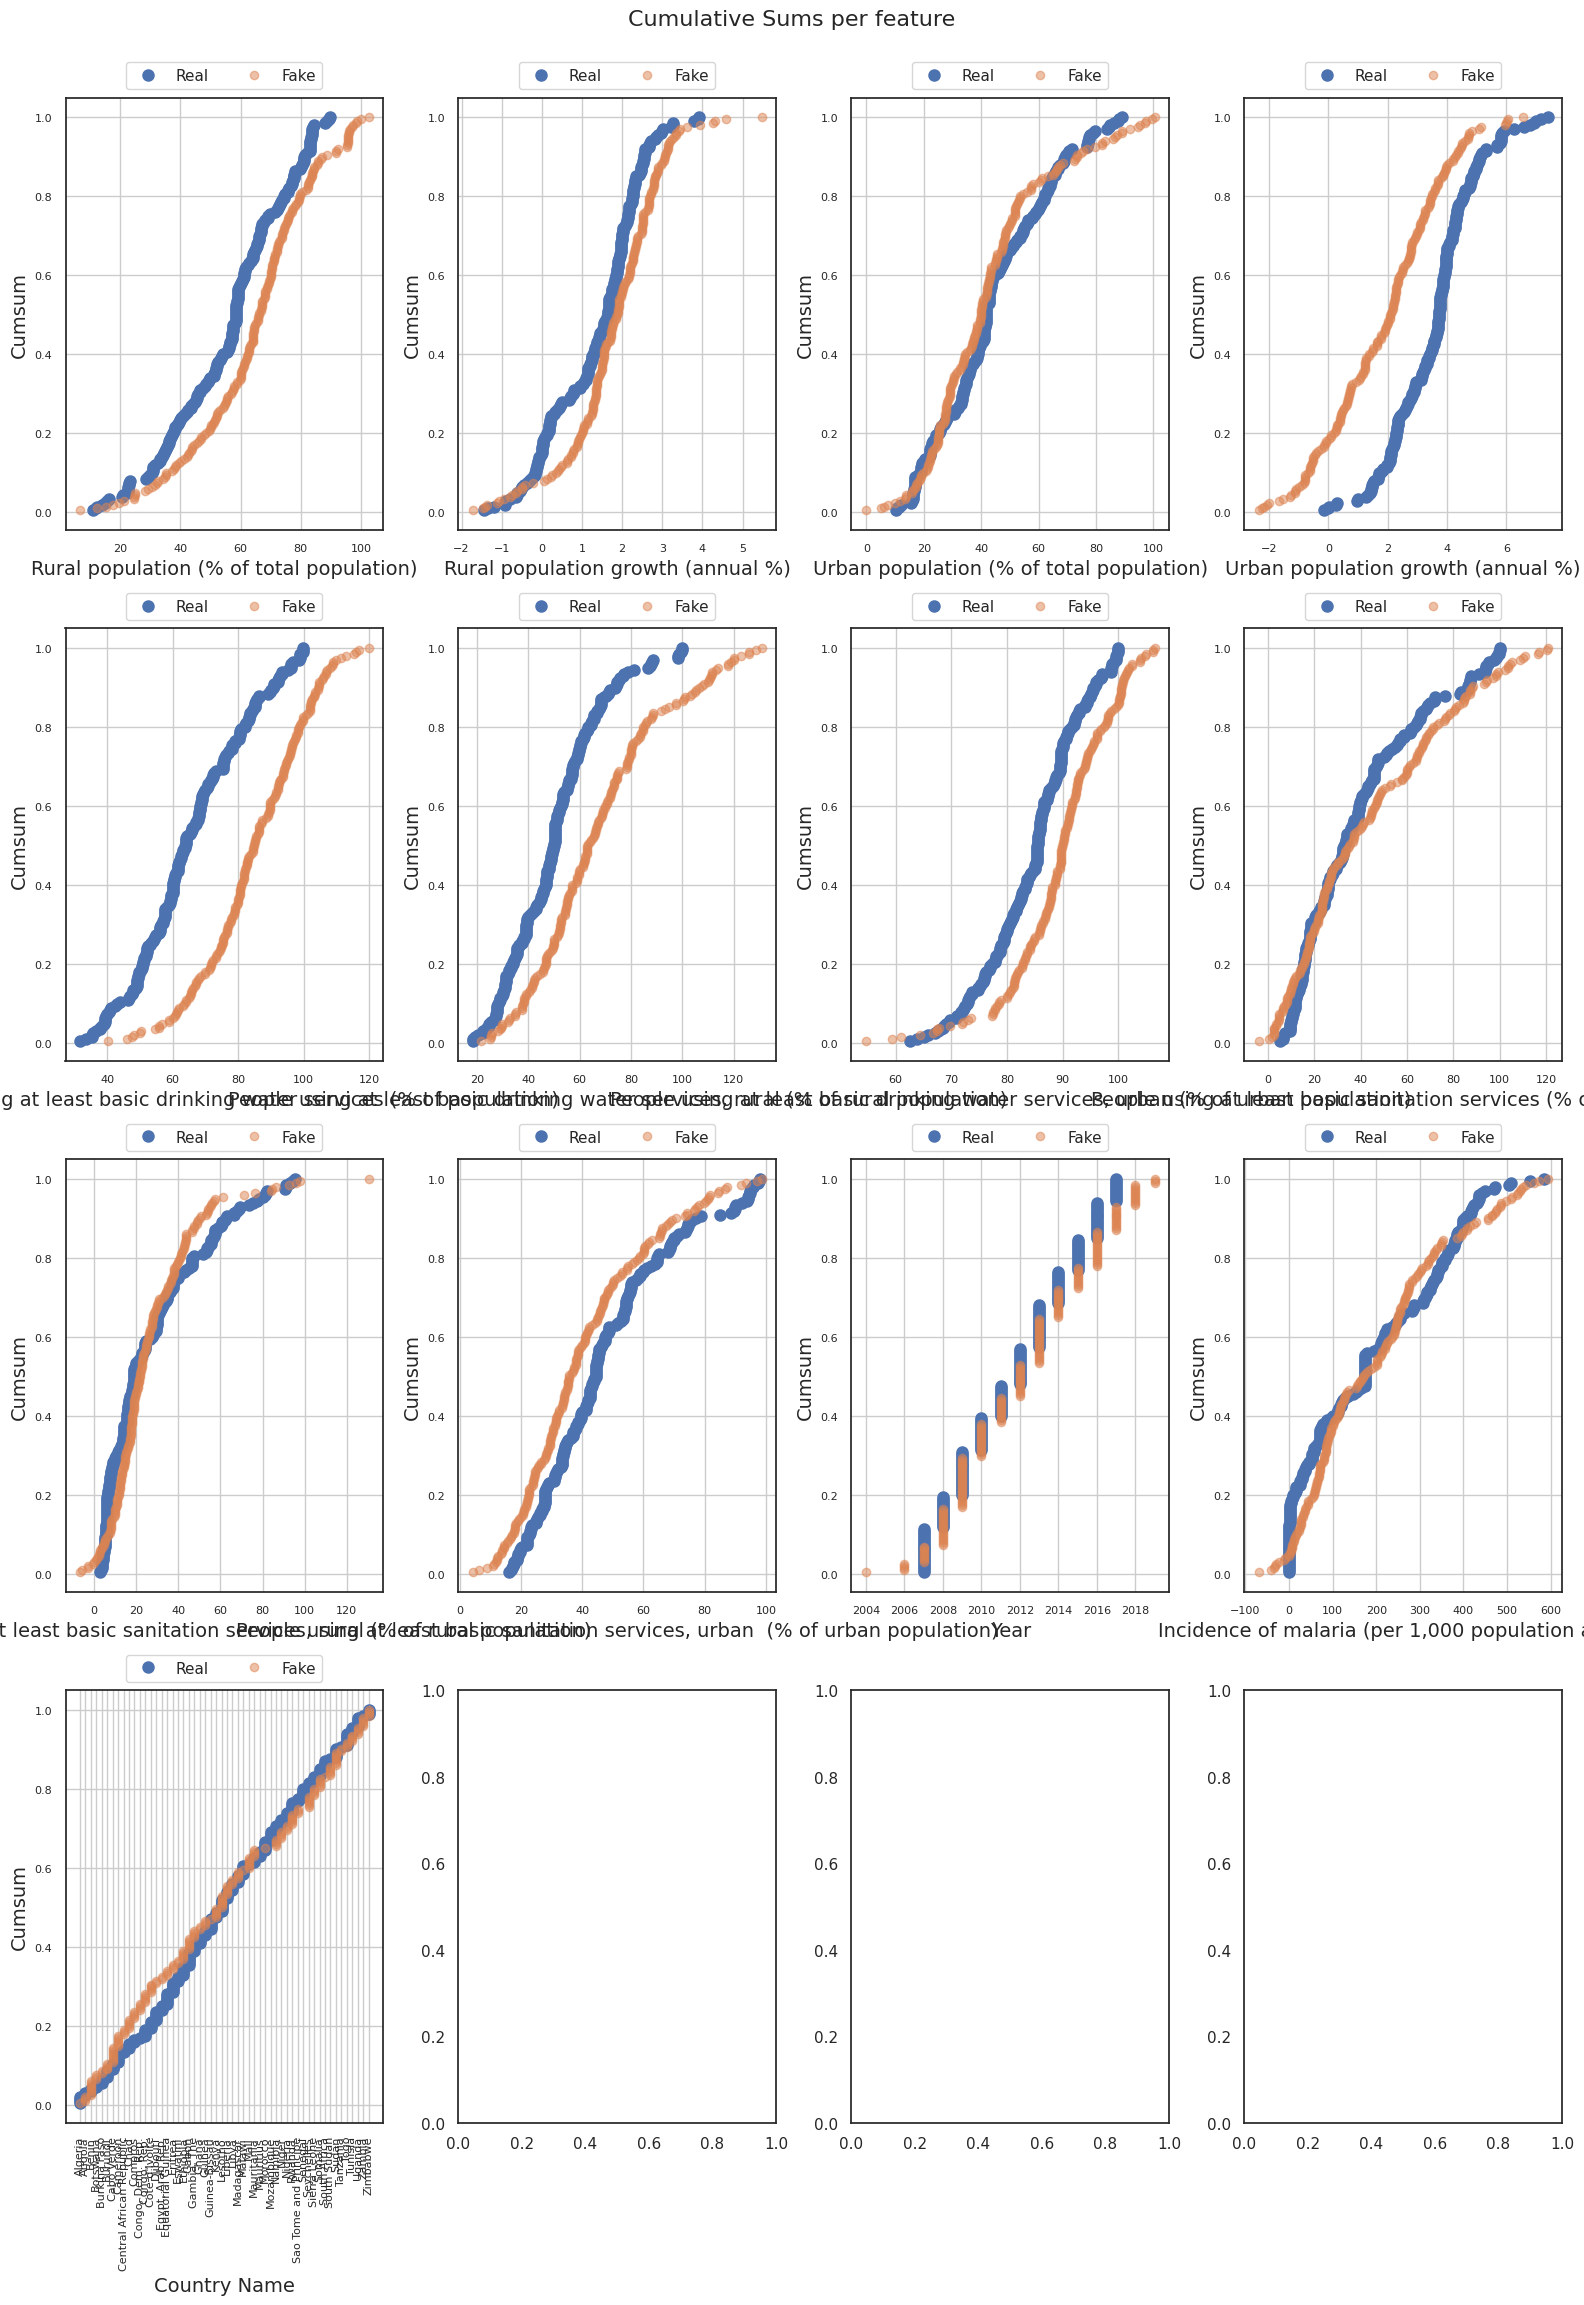

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


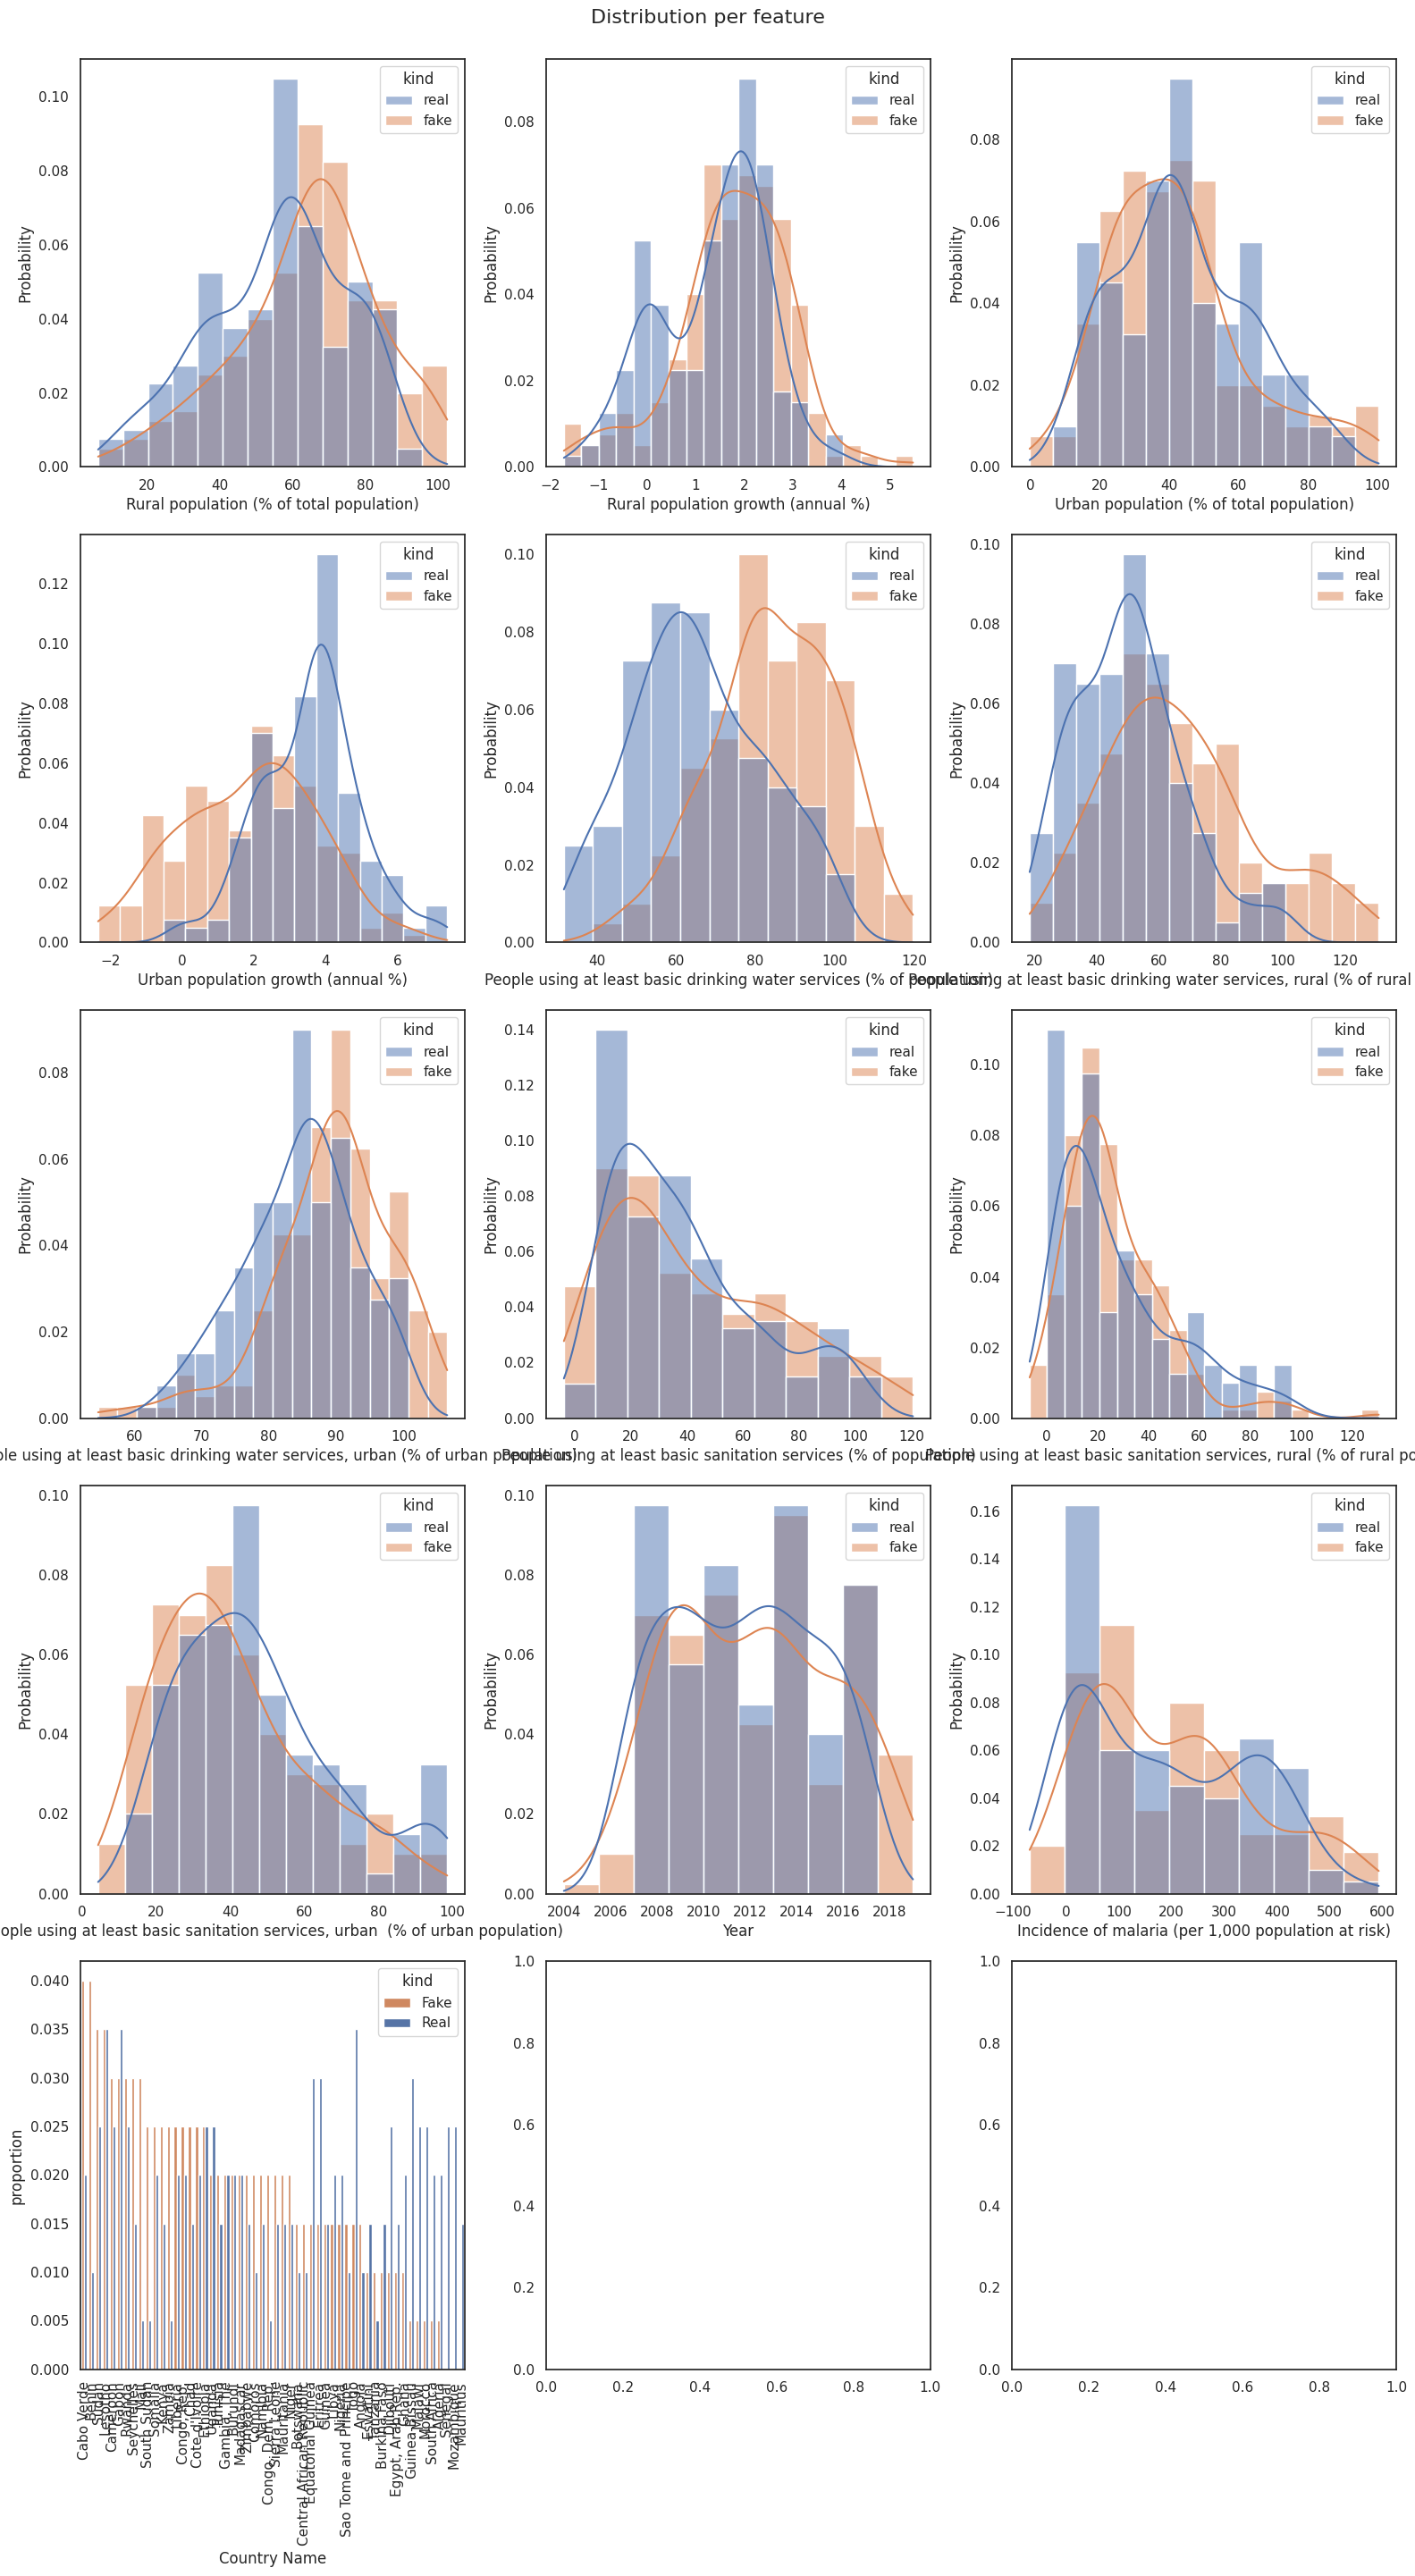

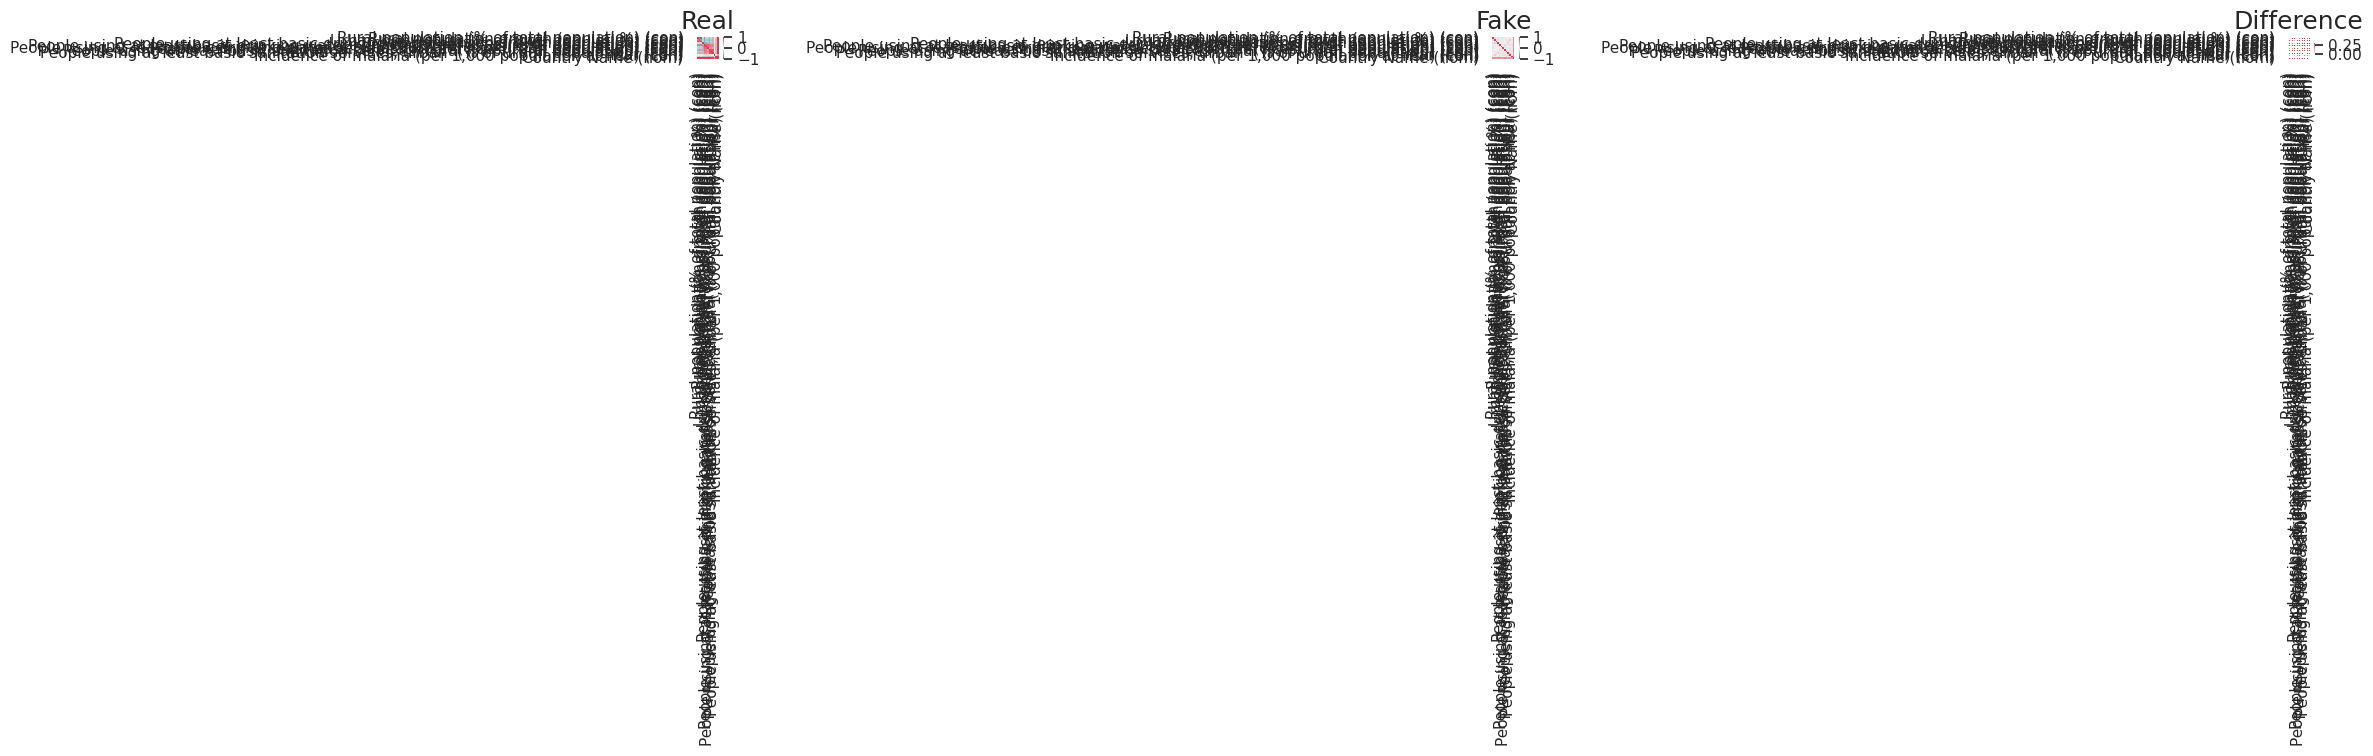

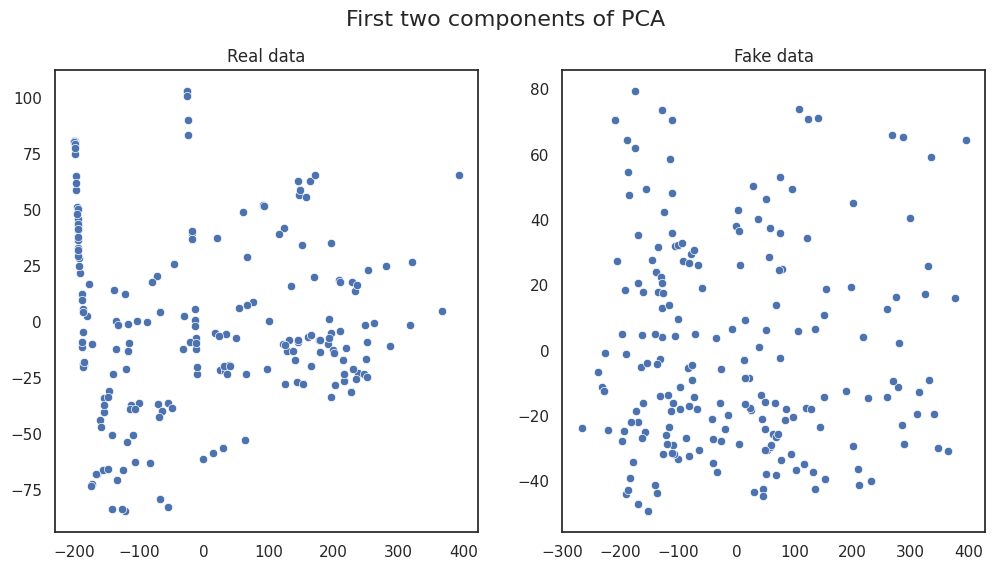

In [89]:
table_evaluator.visual_evaluation()

In [90]:
synth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Rural population (% of total population)                                            200 non-null    float64
 1   Rural population growth (annual %)                                                  200 non-null    float64
 2   Urban population (% of total population)                                            200 non-null    float64
 3   Urban population growth (annual %)                                                  200 non-null    float64
 4   People using at least basic drinking water services (% of population)               200 non-null    float64
 5   People using at least basic drinking water services, rural (% of rural population)  200 non-null   

In [91]:
synth_data.describe()

Rural population (% of total population)  \
count                                200.000000   
mean                                  64.187439   
std                                   19.476293   
min                                    6.651955   
25%                                   52.378763   
50%                                   66.275725   
75%                                   76.264370   
max                                  102.517542   

       Rural population growth (annual %)  \
count                          200.000000   
mean                             1.779093   
std                              1.162437   
min                             -1.716242   
25%                              1.258233   
50%                              1.888216   
75%                              2.523168   
max                              5.474274   

       Urban population (% of total population)  \
count                                200.000000   
mean                                  42.299798   
std                                   20.585829   
min                                   -0.193028   
25%                                   27.515804   
50%                                   39.858598   
75%                                   51.738424   
max                                  100.365902   

       Urban population growth (annual %)  \
count                          200.000000   
mean                             1.881003   
std                              1.878100   
min                             -2.346438   
25%                              0.444554   
50%                              2.096037   
75%                              3.236720   
max                              6.573995   

       People using at least basic drinking water services (% of population)  \
count                                         200.000000                       
mean                                           84.815149                       
std                                            15.660937                       
min                                            40.292714                       
25%                                            75.189142                       
50%                                            84.881667                       
75%                                            96.339263                       
max                                           119.796192                       

       People using at least basic drinking water services, rural (% of rural population)  \
count                                         200.000000                                    
mean                                           67.362554                                    
std                                            24.741189                                    
min                                            21.383347                                    
25%                                            49.929379                                    
50%                                            63.159315                                    
75%                                            80.492512                                    
max                                           130.934449                                    

       People using at least basic drinking water services, urban (% of urban population)  \
count                                         200.000000                                    
mean                                           89.427246                                    
std                                             9.131117                                    
min                                            54.634483                                    
25%                                            84.425244                                    
50%                                            89.904995                                    
75%                                            95.307084         

In [92]:
# Merge the real and generated data to create a new train dataset
merged_train = pd.concat([data_train, synth_data], ignore_index=True)

In [93]:
merged_train

Rural population (% of total population)  \
0                                   67.010000   
1                                   71.220000   
2                                   60.280000   
3                                   76.700000   
4                                   58.445000   
..                                        ...   
670                                 66.969754   
671                                102.517542   
672                                 62.435167   
673                                 74.466251   
674                                 46.230997   

     Rural population growth (annual %)  \
0                              2.050000   
1                              2.040000   
2                              1.880000   
3                              0.620000   
4                              1.675000   
..                                  ...   
670                            2.899224   
671                            1.142310   
672                            0.046707   
673                            0.482240   
674                            3.075477   

     Urban population (% of total population)  \
0                                   32.990000   
1                                   28.780000   
2                                   39.720000   
3                                   23.300000   
4                                   41.560000   
..                                        ...   
670                                 26.585056   
671                                 30.455016   
672                                 52.896539   
673                                 51.747194   
674                                 73.284578   

     Urban population growth (annual %)  \
0                              2.390000   
1                              2.850000   
2                              3.510000   
3                              1.470000   
4                              3.730000   
..                                  ...   
670                            1.513517   
671                            2.254754   
672                            1.087464   
673                            2.178142   
674                            5.129940   

     People using at least basic drinking water services (% of population)  \
0                                            50.460000                       
1                                            80.170000                       
2                                            60.890000                       
3                                            67.940000                       
4                                            50.330000                       
..                                                 ...                       
670                                          95.882507                       
671                                          81.919170                       
672                                          80.688812                       
673                                          81.693928                       
674                                          81.911757                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                            42.760000                                    
1                                            76.910000                                    
2                                            48.320000                                    
3                                            59.370000                                    
4                                            27.800000                                    
..                                                 ...                                    
670                                          85.937491                                    
671                                          64.041385                                    
672                                  

In [94]:
# Shuffle the dataset
merged_train = merged_train.sample(frac = 1).reset_index(drop=True)
merged_train

Rural population (% of total population)  \
0                                   21.950000   
1                                   55.483305   
2                                   15.050000   
3                                   97.267844   
4                                   51.420000   
..                                        ...   
670                                 61.310000   
671                                 58.360000   
672                                 42.900000   
673                                 61.140000   
674                                 36.140000   

     Rural population growth (annual %)  \
0                              0.060000   
1                              0.952955   
2                             -0.620000   
3                              1.511512   
4                              2.140000   
..                                  ...   
670                            1.190000   
671                            1.460000   
672                            1.360000   
673                            1.620000   
674                           -2.530000   

     Urban population (% of total population)  \
0                                   78.050000   
1                                   88.921301   
2                                   84.960000   
3                                   17.421646   
4                                   48.580000   
..                                        ...   
670                                 38.690000   
671                                 41.640000   
672                                 57.110000   
673                                 38.860000   
674                                 63.870000   

     Urban population growth (annual %)  \
0                              1.310000   
1                              3.864374   
2                              3.970000   
3                             -1.301373   
4                              3.710000   
..                                  ...   
670                            1.980000   
671                            3.140000   
672                            4.300000   
673                            3.260000   
674                            3.720000   

     People using at least basic drinking water services (% of population)  \
0                                            93.190000                       
1                                            78.945521                       
2                                            83.700000                       
3                                            92.148543                       
4                                            70.380000                       
..                                                 ...                       
670                                          49.040000                       
671                                          60.810000                       
672                                          77.000000                       
673                                          51.940000                       
674                                          84.340000                       

     People using at least basic drinking water services, rural (% of rural population)  \
0                                            50.435000                                    
1                                            75.473204                                    
2                                            48.230000                                    
3                                            86.120063                                    
4                                            59.000000                                    
..                                                 ...                                    
670                                          36.430000                                    
671                                          50.140000                                    
672                                  

In [95]:
merged_train.columns

Index(['Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Country Name'],
      dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [97]:
le = LabelEncoder()
merged_train['Encoded Country'] = le.fit_transform(merged_train['Country Name'])

In [98]:
merged_train['Encoded Country']

0      28
1      13
2      20
3      12
4      27
       ..
670     8
671    43
672    21
673    43
674     3
Name: Encoded Country, Length: 675, dtype: int64

In [99]:
X_merged_train = merged_train.drop(columns=['Country Name', 'Encoded Country'])
y_merged_train = merged_train['Encoded Country']

In [100]:
clf = LogisticRegression(random_state=42).fit(X_merged_train, y_merged_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
features

array(['Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude'], dtype=object)

In [102]:
y_pred = clf.predict(X_test)

In [103]:
y_pred_lbl = le.inverse_transform(y_pred)

In [104]:
print(classification_report(y_test, y_pred_lbl, zero_division=0))

                          precision    recall  f1-score   support

                 Algeria       1.00      1.00      1.00         1
                  Angola       0.80      1.00      0.89         4
                   Benin       0.00      0.00      0.00         4
                Botswana       0.33      1.00      0.50         1
            Burkina Faso       0.00      0.00      0.00         2
                 Burundi       0.33      1.00      0.50         1
              Cabo Verde       0.00      0.00      0.00         3
                Cameroon       0.00      0.00      0.00         1
Central African Republic       1.00      1.00      1.00         1
                    Chad       0.17      1.00      0.29         1
                 Comoros       0.00      0.00      0.00         4
        Congo, Dem. Rep.       1.00      1.00      1.00         3
             Congo, Rep.       0.50      1.00      0.67         1
           Cote d'Ivoire       0.00      0.00      0.00         0
         

# Deploying Model

In [105]:
import pickle

In [113]:
#saving malaria model using pickle
with open('/content/drive/My Drive/Colab Notebooks/hamoye24/clf_model.pkl','wb') as file:
  pickle.dump(clf,file)

with open('/content/drive/My Drive/Colab Notebooks/hamoye24/label_encoder.pkl','wb') as file:
  pickle.dump(le,file)


In [114]:
# Loading the trained model and LabelEncoder
with open('/content/drive/My Drive/Colab Notebooks/hamoye24/clf_model.pkl', 'rb') as file:
    clf = pickle.load(file)

with open('/content/drive/My Drive/Colab Notebooks/hamoye24/label_encoder.pkl', 'rb') as file:
    le = pickle.load(file)

# Defining functions for making predictions
def predict(features):
    prediction = clf.predict([features])
    return prediction[0]


In [110]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


In [111]:
%%writefile app.py
import streamlit as st

# Load the remittance prediction model
model_path = 'clf_model.pkl'
loaded_model = pickle.load(open(model_path, 'rb'))

# Load the label Encoder
encoder_path = 'label_encoder.pkl'
encoder = pickle.load(open(encoder_path, 'rb'))

def malaria_prediction(feature_inputs):

    # Collecting all the features into a list
    input_data = [ c for c in feature_inputs]

    prediction = loaded_model.predict(input_data)
    prediction = loaded_model.predict(features)
    predicted_country = le.inverse_transform([prediction])[0]
    return predicted_country



def main():
  # Streamlit app
  st.title("Malaria Hotspot Prediction by Country")

  st.write("""
  # Predict the likelihood of malaria hotspots based on various factors.
  Enter the features below:
  """)

  # Creating input fields for the features
  rural_population = st.number_input("Rural population (% of total population)", min_value=0.0, max_value=100.0, value=50.0)
  rural_population_growth = st.number_input("Rural population growth (annual %)", min_value=-10.0, max_value=10.0, value=0.0)
  urban_population = st.number_input("Urban population (% of total population)", min_value=0.0, max_value=100.0, value=50.0)
  urban_population_growth = st.number_input("Urban population growth (annual %)", min_value=-10.0, max_value=10.0, value=0.0)
  basic_drinking_water_services = st.number_input("People using at least basic drinking water services (% of population)", min_value=0.0, max_value=100.0, value=80.0)
  basic_drinking_water_services_rural = st.number_input("People using at least basic drinking water services, rural (% of rural population)", min_value=0.0, max_value=100.0, value=70.0)
  basic_drinking_water_services_urban = st.number_input("People using at least basic drinking water services, urban (% of urban population)", min_value=0.0, max_value=100.0, value=90.0)
  basic_sanitation_services = st.number_input("People using at least basic sanitation services (% of population)", min_value=0.0, max_value=100.0, value=60.0)
  basic_sanitation_services_rural = st.number_input("People using at least basic sanitation services, rural (% of rural population)", min_value=0.0, max_value=100.0, value=50.0)
  basic_sanitation_services_urban = st.number_input("People using at least basic sanitation services, urban  (% of urban population)", min_value=0.0, max_value=100.0, value=70.0)
  year = st.number_input("Year", min_value=1900, max_value=2100, value=2023)
  malaria_incidence = st.number_input("Incidence of malaria (per 1,000 population at risk)", min_value=0.0, max_value=1000.0, value=10.0)

  features = [
      rural_population,
      rural_population_growth,
      urban_population,
      urban_population_growth,
      basic_drinking_water_services,
      basic_drinking_water_services_rural,
      basic_drinking_water_services_urban,
      basic_sanitation_services,
      basic_sanitation_services_rural,
      basic_sanitation_services_urban,
      year,
      malaria_incidence
  ]

  # Code for Prediction
  if st.button('Predict Malaria Incidence'):
          try:
              prediction = malaria_prediction(features)
              st.success(f'The country were this incidence of malaria is likely to have occurred is {prediction}')
          except ValueError as e:
              st.error(f'Error: {e}. Please ensure the country name is correct and matches the training data.')

  if __name__ == '__main__':
      main()


Overwriting app.py
